In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
from prophet import Prophet
import os
from statsmodels.tsa.arima.model import ARIMA




In [ ]:
#create dataframe and load dataset
df=pd.read_csv('/content/salesdaily (1).csv')


In [ ]:
df.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [ ]:
df.tail()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
2180  6/20/2016   7.34  3.340   6.00    NaN   5.0   0.0  8.0  6.0  2016   
2181  6/21/2016   7.33    NaN   9.00   23.0  15.0   0.0  7.0  5.6  2016   
2182  6/22/2016   2.00  6.067   2.30   42.0   6.0   0.0  2.0  2.0  2016   
2183  6/23/2016   3.00  0.330    NaN   19.0   5.0   0.0  1.0  3.0  2016   
2184        NaN   6.00  2.340   3.05   19.0  15.0   0.0  1.0  2.0  2016   

      Month  Hour Weekday Name  
2180      6   276       Monday  
2181      6   276      Tuesday  
2182      6   276    Wednesday  
2183      6   276     Thursday  
2184      6   276       Friday

In [ ]:
df.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2181.000000  2178.000000  2178.000000  2182.000000  2181.000000   
mean      5.031512     3.885747     3.880330    29.807074     8.867372   
std       2.733850     2.124229     2.384044    15.453102     5.600736   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.600000     8.000000   
75%       6.670000     5.140000     5.200000    38.100000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2181.000000  2183.000000  2185.000000  2185.000000  2185.000000   
mean      0.596038     5.477244     2.929514  2016.362471     6.315332   
std       1.096646     6.382810     2.439947     1.659820     3.355312   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour  
count  2185.000000  
mean    275.947826  
std       1.934605  
min     190.000000  
25%     276.000000  
50%     276.000000  
75%     276.000000  
max     276.000000

In [ ]:
df.dtypes

datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Year              int64
Month             int64
Hour              int64
Weekday Name     object
dtype: object

In [ ]:
# convert Datum column into Date time format
df['datum'] = pd.to_datetime(df['datum'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2177 non-null   datetime64[ns]
 1   M01AB         2181 non-null   float64       
 2   M01AE         2178 non-null   float64       
 3   N02BA         2178 non-null   float64       
 4   N02BE         2182 non-null   float64       
 5   N05B          2181 non-null   float64       
 6   N05C          2181 non-null   float64       
 7   R03           2183 non-null   float64       
 8   R06           2185 non-null   float64       
 9   Year          2185 non-null   int64         
 10  Month         2185 non-null   int64         
 11  Hour          2185 non-null   int64         
 12  Weekday Name  2185 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 222.0+ KB


In [ ]:
df.isna().sum()

datum           8
M01AB           4
M01AE           7
N02BA           7
N02BE           3
N05B            4
N05C            4
R03             2
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [ ]:
df.shape

(2185, 13)

In [ ]:
df.duplicated().sum()

42

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isna().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(2104, 13)

In [ ]:
df_2=df

In [ ]:
#creating total sales each  day
df_2['Total'] = df_2['M01AB'] + df_2['M01AE'] + df_2['N02BA'] + df_2['N02BE']
+ df_2['N05B'] + df_2['N05C'] + df_2['R03'] + df_2['R06']

0        9.0
1       40.0
2       20.0
3       11.0
4       26.0
        ... 
2099    11.1
2100    14.0
2101    15.0
2102    17.0
2103    24.0
Length: 2104, dtype: float64

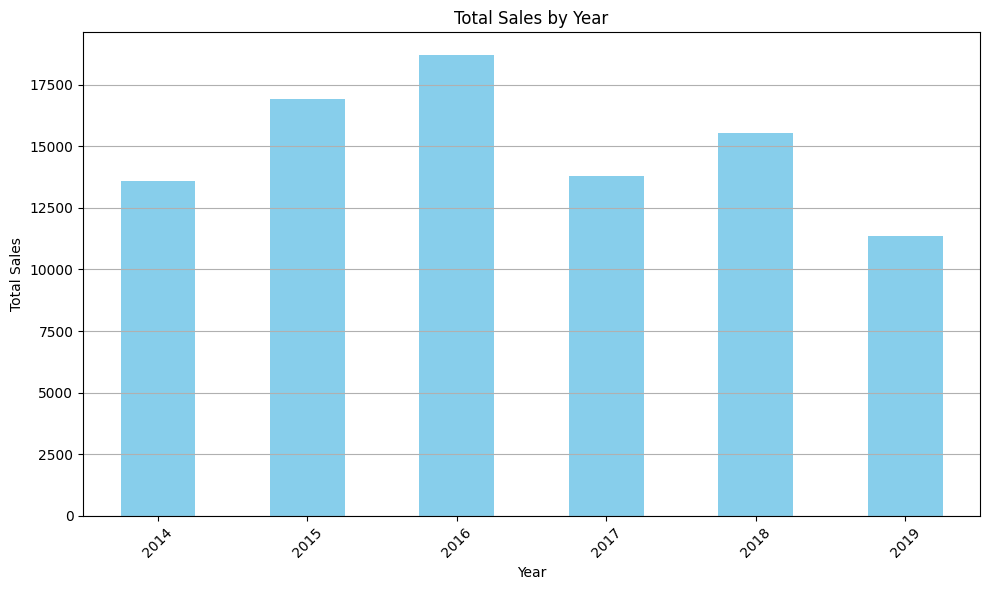

In [ ]:
# Group by year and sum total sales for each year
yearly_sales = df_2.groupby('Year')['Total'].sum()

# Plotting
yearly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Total Sales of Each Drug

In [ ]:


df4 = df_2[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

# Sum of each column
column_sums = df4.sum()

# Find the most sold drug from total sales across all years
most_sold_drug_total = column_sums.idxmax()
most_sold_sales_total = column_sums.max()

print("Sum of each column:")
print(column_sums)
print("\nMost sold drug from total sales across all years:")
print(f"The most sold drug is '{most_sold_drug_total}' with total sales of {most_sold_sales_total}.")



Sum of each column:
M01AB    10593.097083
M01AE     8187.918646
N02BA     8164.209000
N02BE    62945.402708
N05B     18632.737500
N05C      1249.958333
R03      11603.822917
R06       6103.287500
dtype: float64

Most sold drug from total sales across all years:
The most sold drug is 'N02BE' with total sales of 62945.40270834.


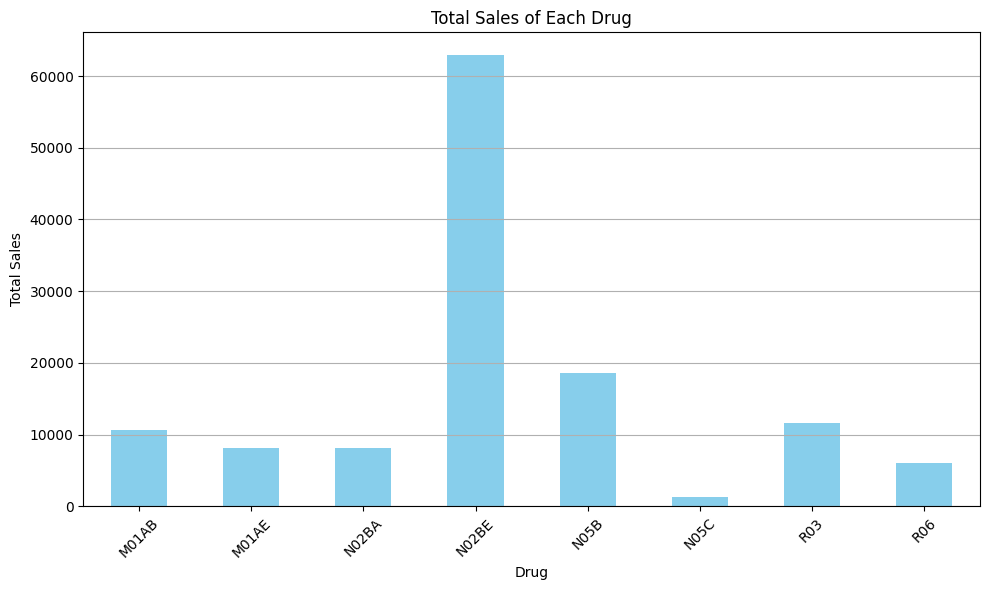

In [ ]:
# 3. Plot a graph to visualize the total sales of each drug
plt.figure(figsize=(10, 6))
column_sums.plot(kind='bar', color='skyblue')
plt.title('Total Sales of Each Drug')
plt.xlabel('Drug')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Highest Sales for Each Drug Over the Years

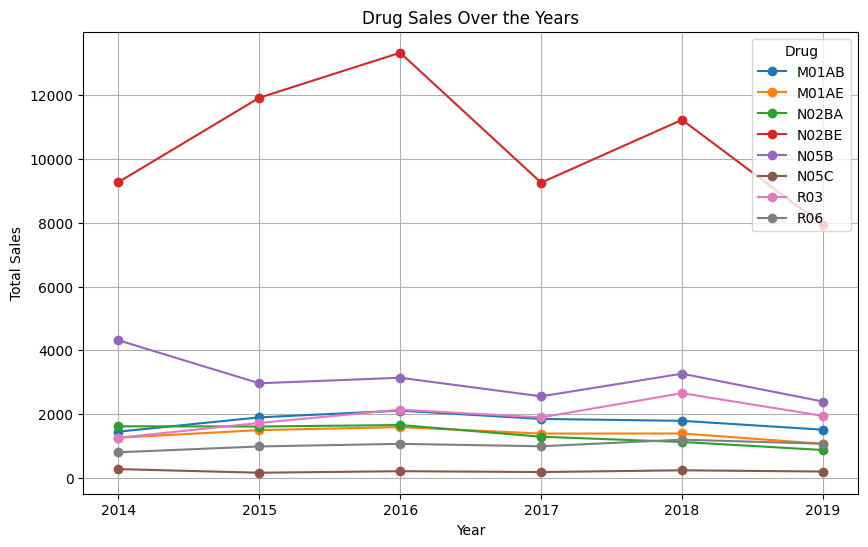

In [ ]:
drug_columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Group by Year and sum the sales of each drug for each year
sales_by_year = df_2.groupby('Year')[drug_columns].sum()

# Plot the results
sales_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Drug Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Drug', loc='upper right')
plt.show()

In [ ]:
# Plot the quantity of Total against the datum using Plotly Express
fig = px.line(df_2, x='datum', y='Total', title='sales of Total over time')
fig.show()

Most sales on 30 Dec 2016

total sale 182.95

In [ ]:
fig = px.line(df_2, x='datum', y='M01AB', title='M01AB sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='M01AE', title='M01AE sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='N02BA', title='N02BA sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='N02BE', title='N02BE sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='N05B', title='N05B sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df, x='datum', y='N05C', title='N05C sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='R03', title='R03 sales of Total over time')
fig.show()

In [ ]:
fig = px.line(df_2, x='datum', y='R06', title='R06 sales of Total over time')
fig.show()

In [ ]:
#finding value count
value_counts = df_2['Year'].value_counts()

# Print the value counts
print(value_counts)


Year
2016    366
2015    365
2017    365
2018    365
2014    364
2019    279
Name: count, dtype: int64


Monthly Consumption of Each Category in 2014

In [ ]:

# Specify the year to filter
specified_year = 2014

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2014]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()

In 2014

N02BE drug has higher sales compared to others.



N05C has lowest sale


Monthly Consumption of Each Category in 2015

In [ ]:
# Specify the year to filter
specified_year = 2015 # Change this to desired year

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2015]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()

In 2015

N02BE drug has higher sales compared to others.

N05B . .

N05C has lowest sale

Monthly Consumption of Each Category in 2016

In [ ]:
# Specify the year to filter
specified_year = 2016  # Change this to desired year

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2016]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()


In 2016

N02BE drug has higher sales compared to others.

N02BA . .

N05C has lowest sale

Monthly Consumption of Each Category in 2017

In [ ]:
# Specify the year want to filter
specified_year = 2017  # Change this to desired year

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2017]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()

In 2017

N02BE drug has higher sales compared to others.

N02BA . .

N05C has lowest sale

Monthly Consumption of Each Category in 2018

In [ ]:
# Specify the year to filter
specified_year = 2018  # Change this to your desired year

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2018]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()


In 2018

N02BE drug has higher sales compared to others.

N02BA

N05C has lowest sale

Monthly Consumption of Each Category in 2019

In [ ]:
# Specify the year  to filter
specified_year = 2019

# Filter the data for the specified year
filtered_df = df_2[df_2['Year'] == 2019]

# Reshape the data to have separate columns for each category
melted_df = pd.melt(filtered_df, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Consumption')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

# Create the bar chart
fig = px.bar(grouped_df, x='Month', y='Consumption', color='Category', barmode='group')

# Customize the layout
fig.update_layout(
    title=f'Total Monthly Consumption of Each Category in {specified_year}',
    xaxis_title='Month',
    yaxis_title='Consumption',
    legend_title='Category',
)

# Show the chart
fig.show()

In 2019

N02BE drug has higher sales compared to others.

N02BA . .

N05C has lowest sale

In [ ]:
df_2

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  \
0    2014-01-02   0.00  3.670   3.40  32.40   7.0   0.0   0.0  2.0  2014   
1    2014-01-03   8.00  4.000   4.40  50.60  16.0   0.0  20.0  4.0  2014   
2    2014-01-04   2.00  1.000   6.50  61.85  10.0   0.0   9.0  1.0  2014   
3    2014-01-05   4.00  3.000   7.00  41.10   8.0   0.0   3.0  0.0  2014   
4    2014-01-06   5.00  1.000   4.50  21.70  16.0   2.0   6.0  2.0  2014   
...         ...    ...    ...    ...    ...   ...   ...   ...  ...   ...   
2099 2019-10-02   5.18  3.274   2.80  30.20   9.0   1.0   0.0  1.1  2019   
2100 2019-10-03   5.00  3.000   4.00  40.40  10.0   0.0   2.0  2.0  2019   
2101 2019-10-04   7.34  5.683   2.25  22.45  13.0   0.0   1.0  1.0  2019   
2102 2019-10-07   7.34  4.507   3.00  50.80   6.0   0.0  10.0  1.0  2019   
2103 2019-10-08   0.33  1.730   0.50  44.30  20.0   2.0   2.0  0.0  2019   

      Month  Hour Weekday Name   Total  
0         1   248     Thursday  39.470  
1         1   276       Friday  67.000  
2         1   276     Saturday  71.350  
3         1   276       Sunday  55.100  
4         1   276       Monday  32.200  
...     ...   ...          ...     ...  
2099     10   276    Wednesday  41.454  
2100     10   276     Thursday  52.400  
2101     10   276       Friday  37.723  
2102     10   276       Monday  65.647  
2103     10   190      Tuesday  46.860  

[2104 rows x 14 columns]

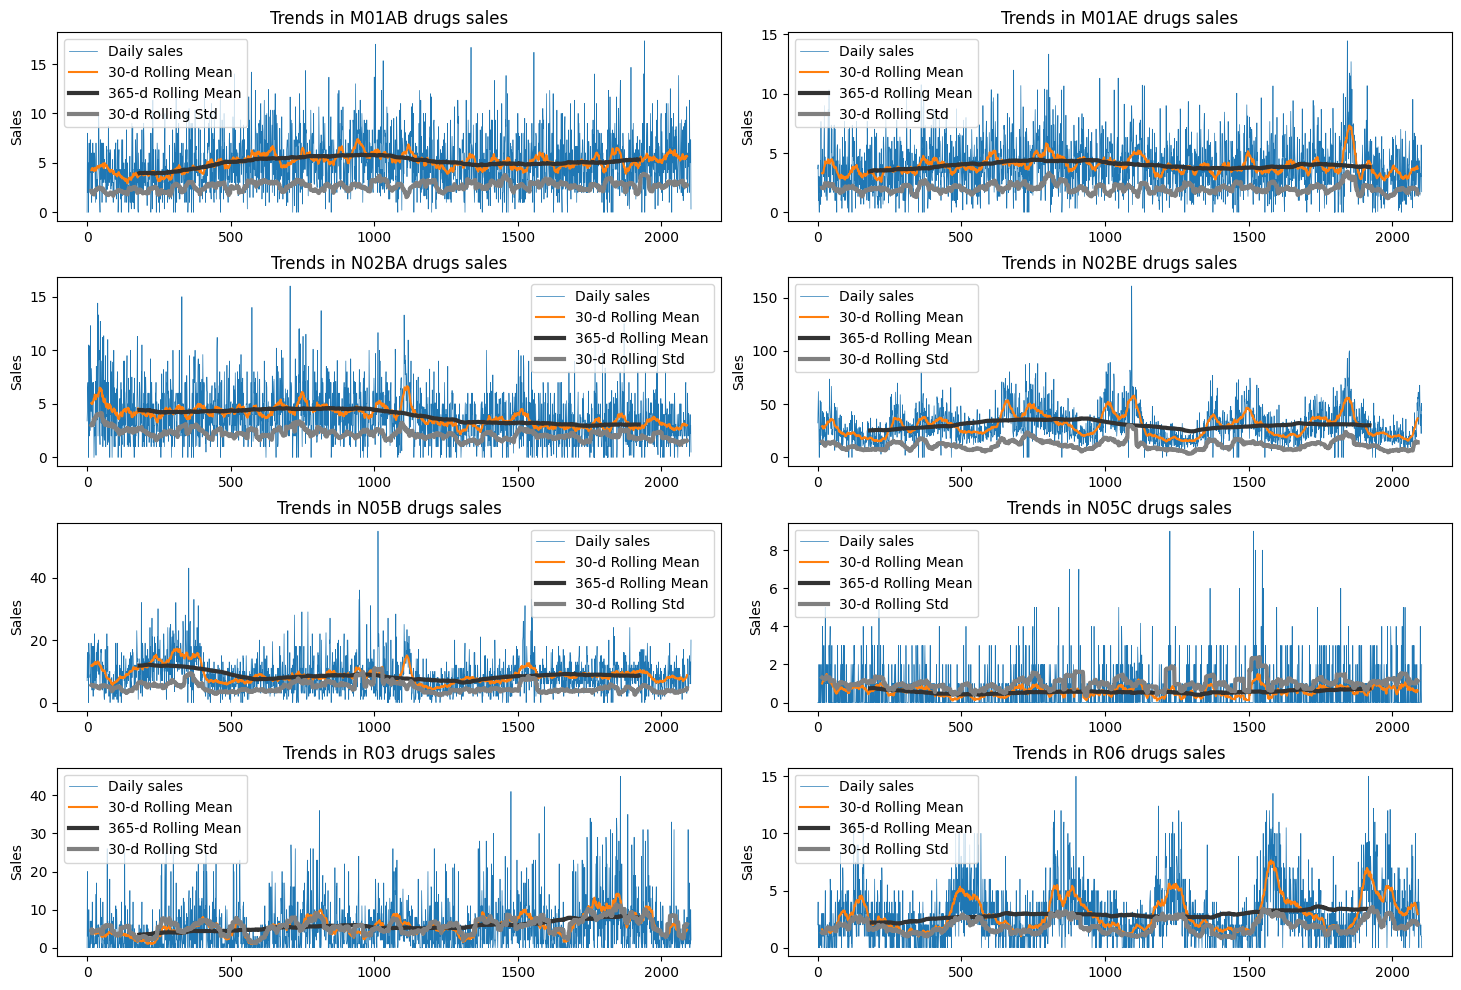

In [ ]:
#Finding 30-d Rolling Mean, 365-d Rolling Mean, 30-d Rolling Std to plot trend graph
dfatc_daily=df_2
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = dfatc_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = dfatc_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = dfatc_daily[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(dfatc_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');
    subplotindex=subplotindex+1
plt.show()

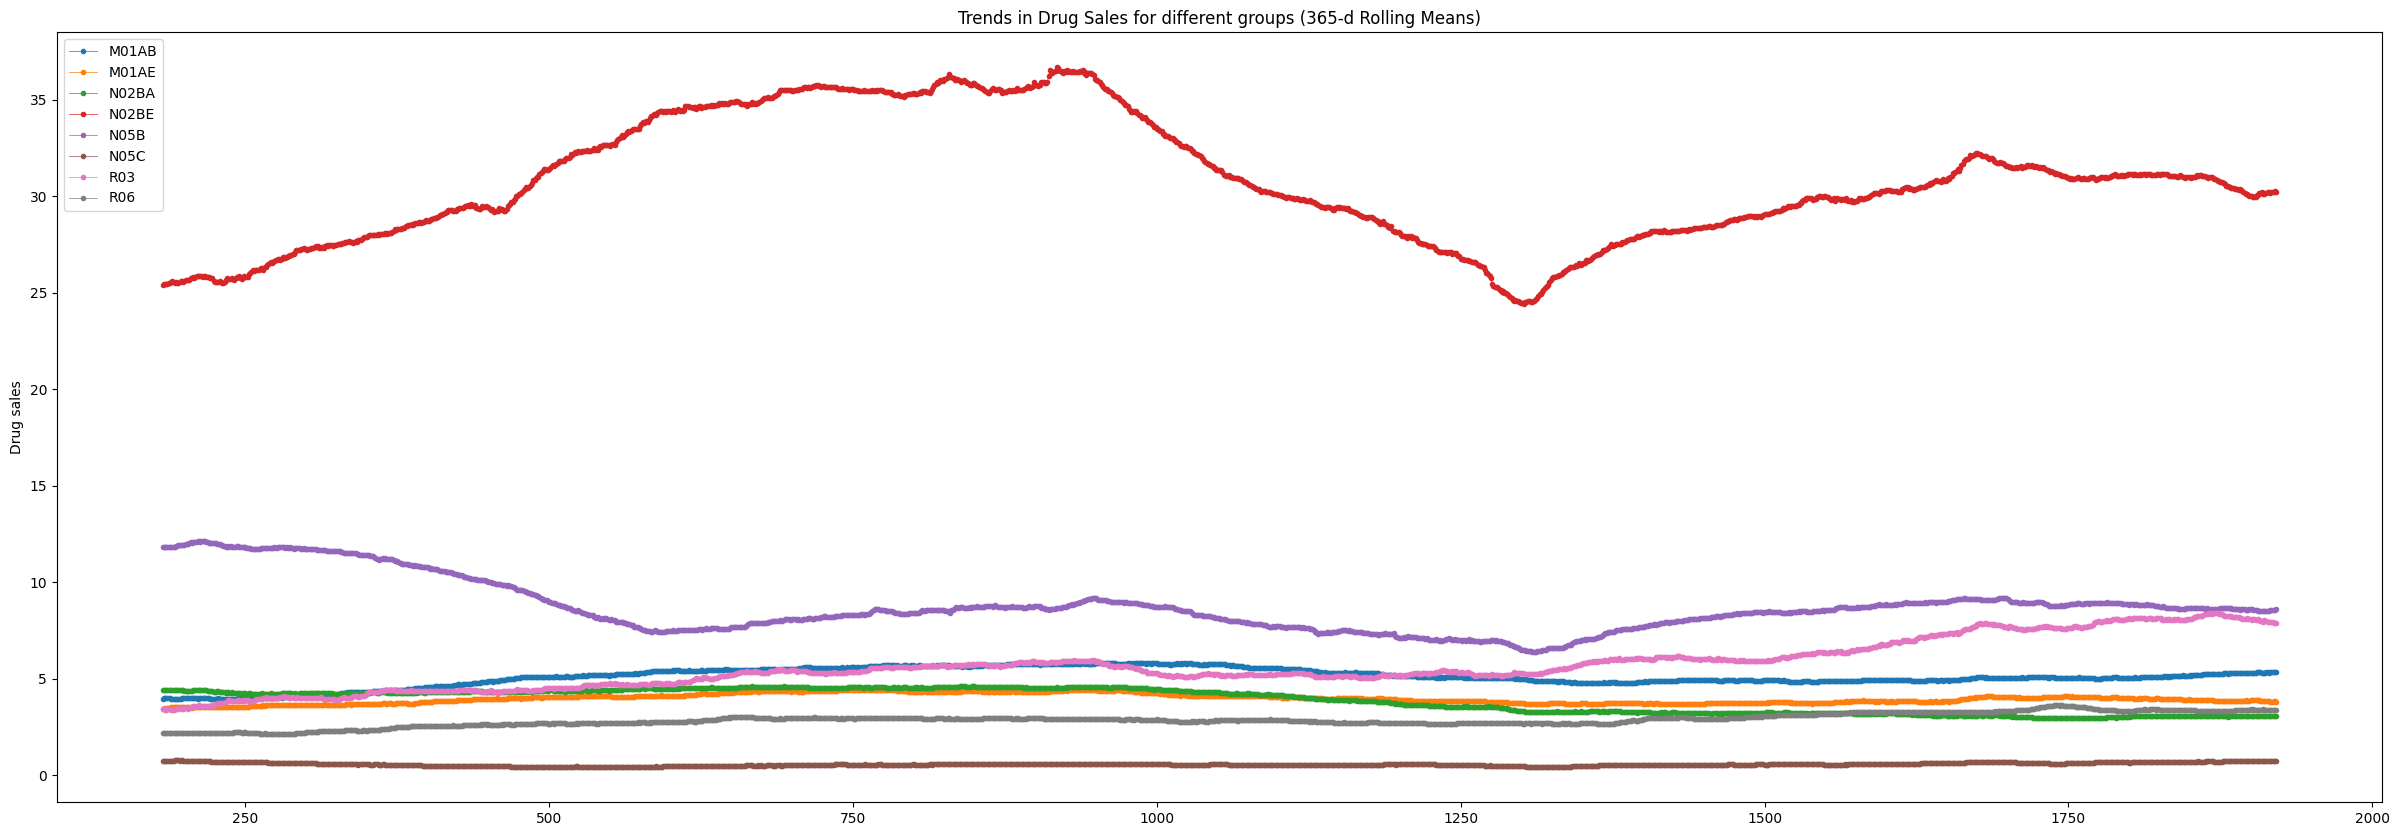

In [ ]:
#Plot trend graphs
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

ploting trend for every year

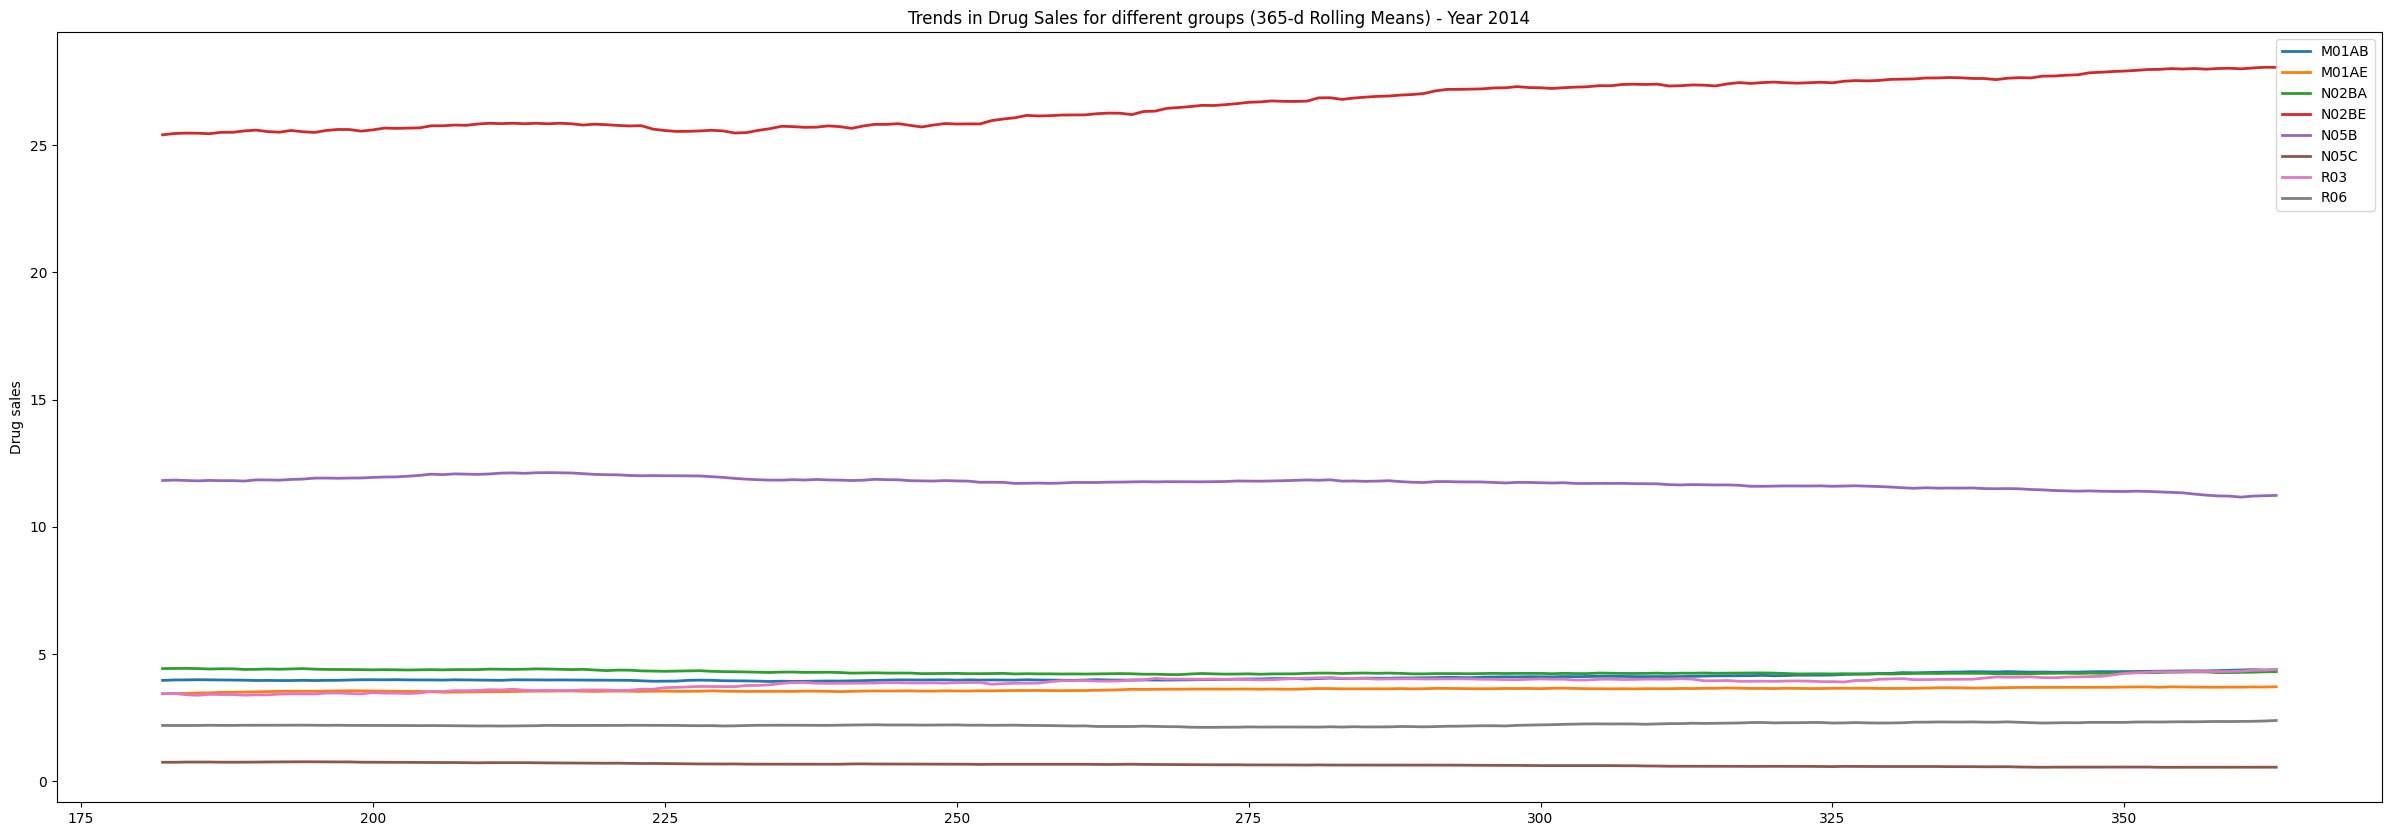

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2014 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()


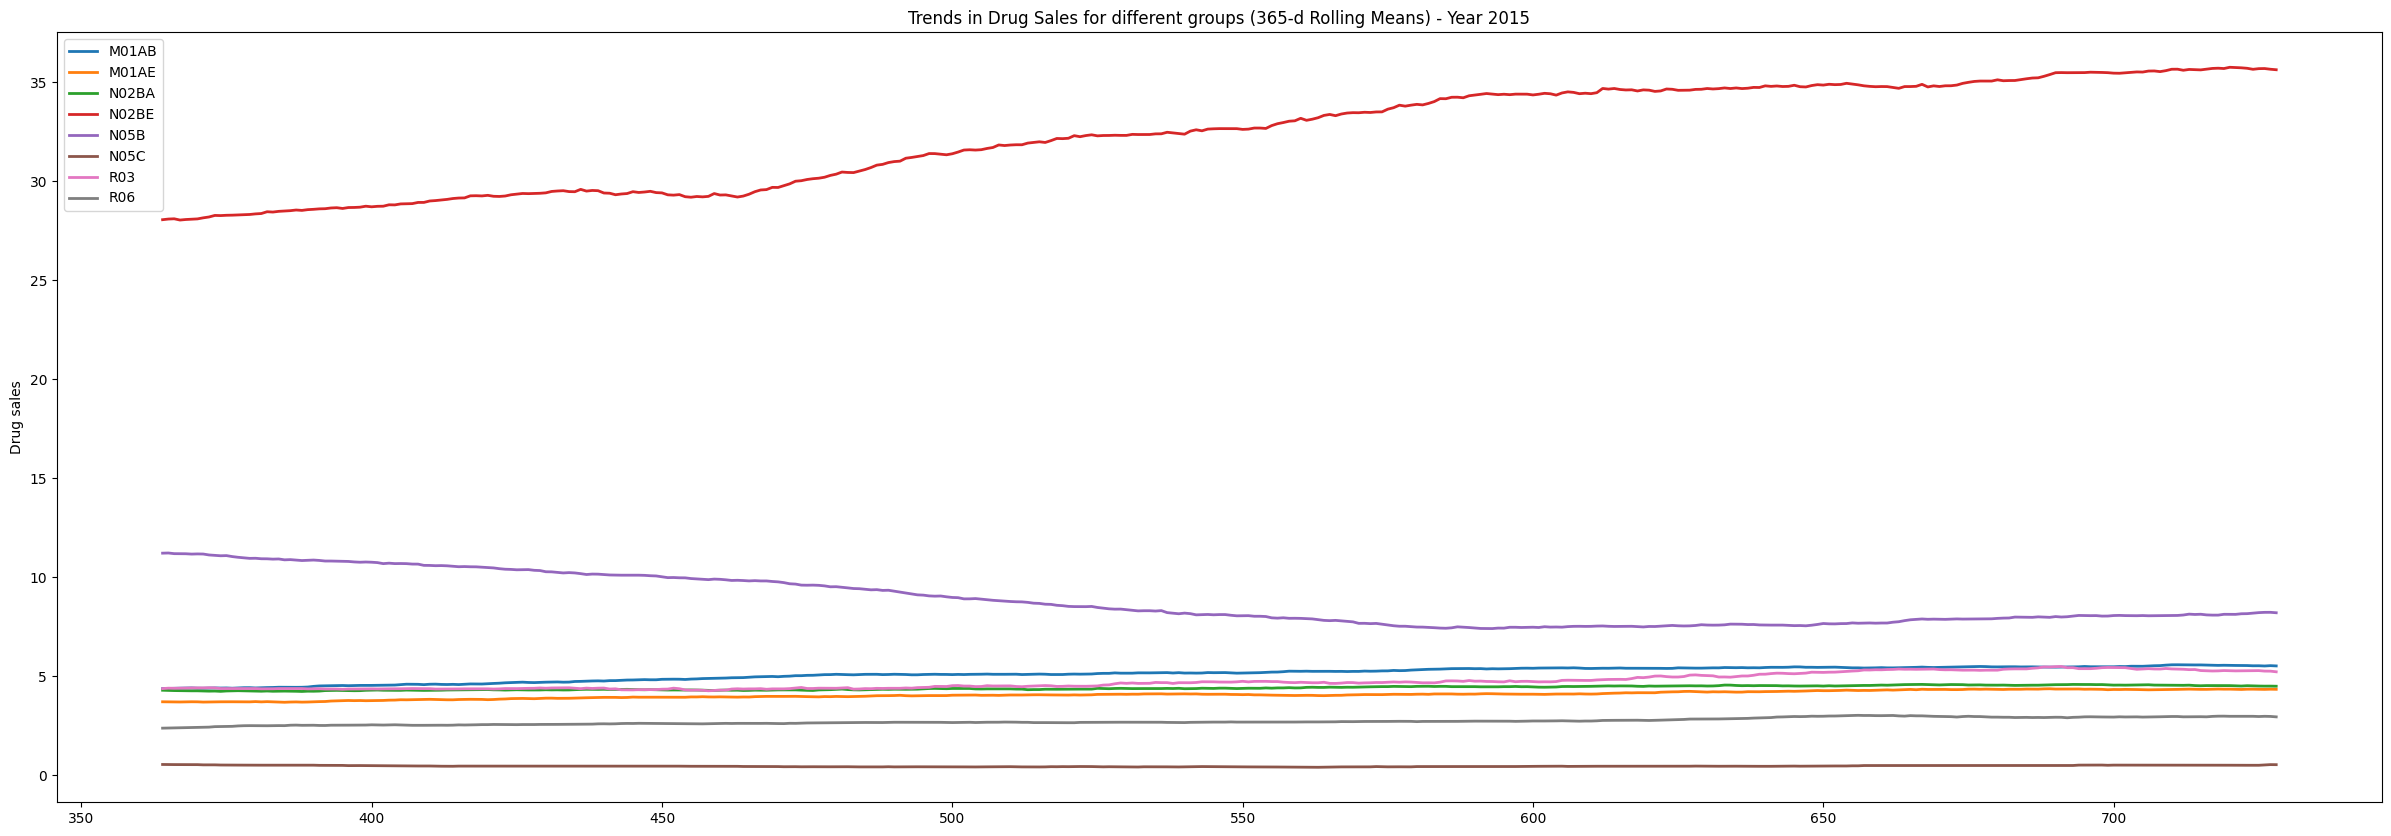

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2015 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()

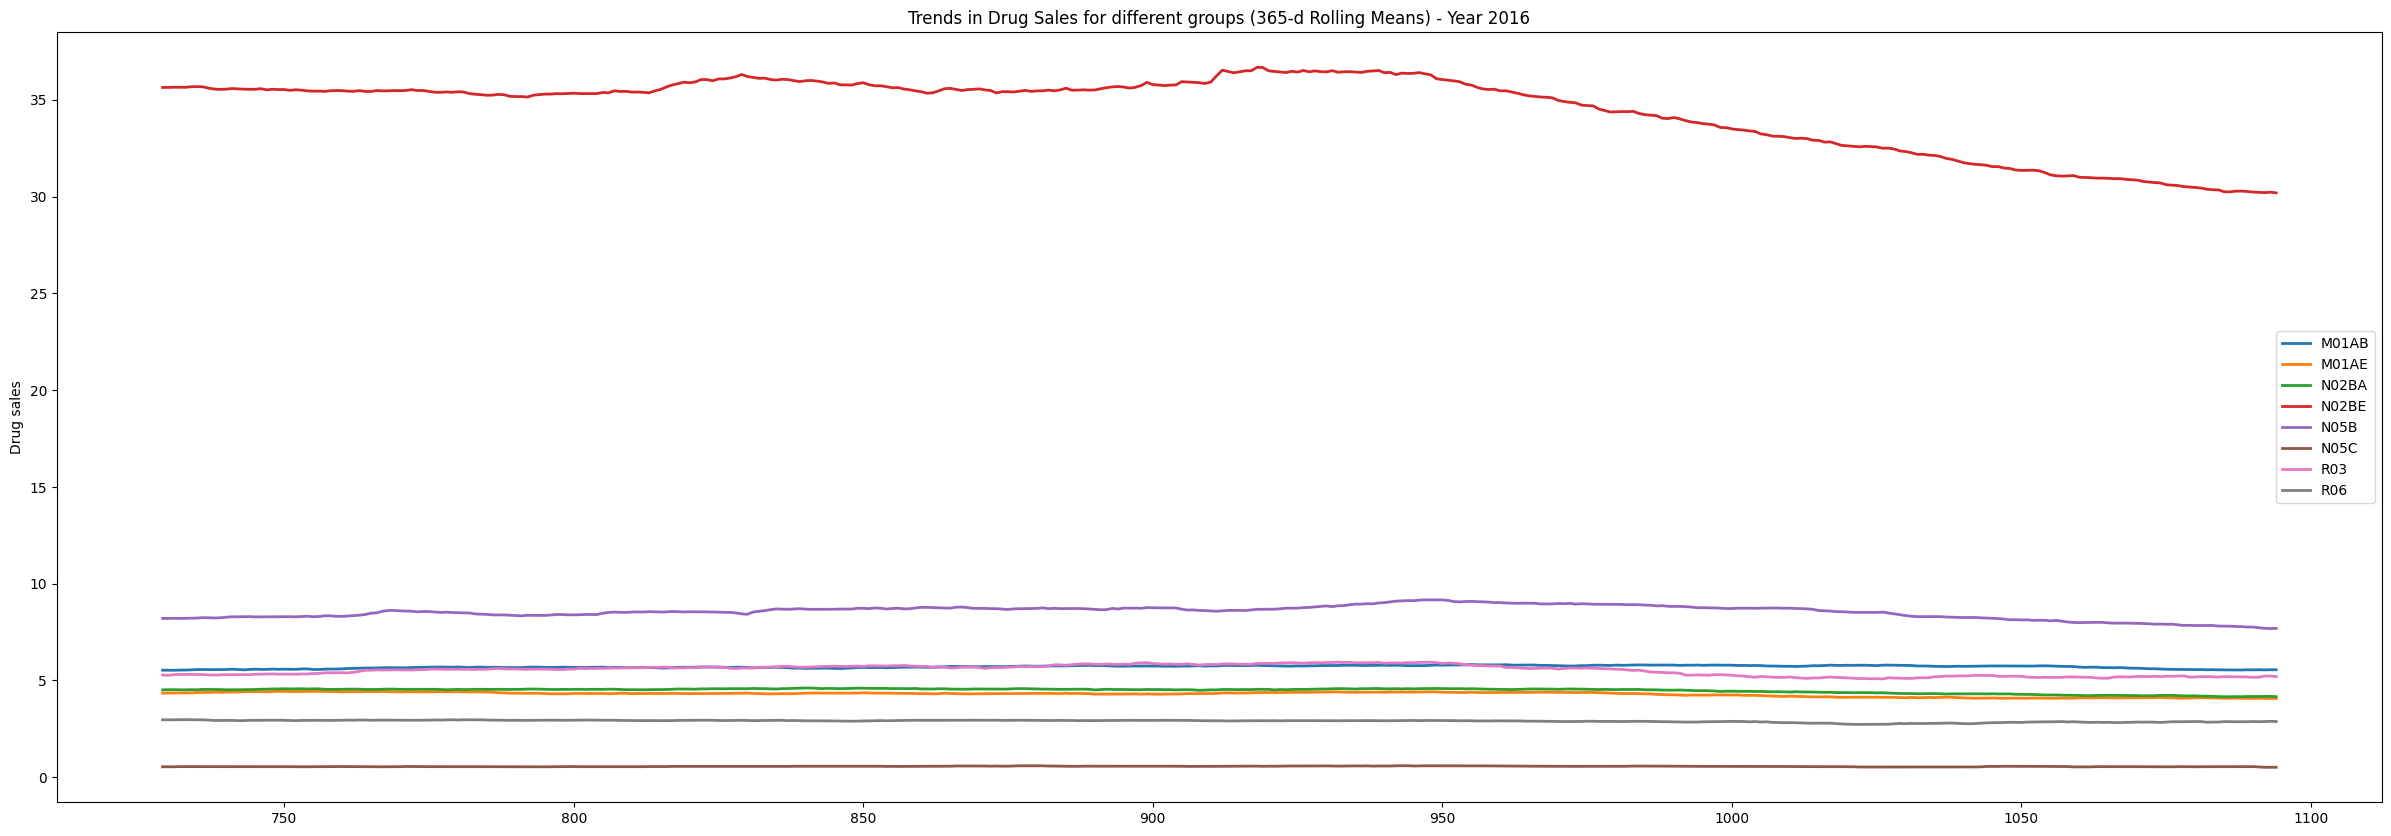

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2016 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()

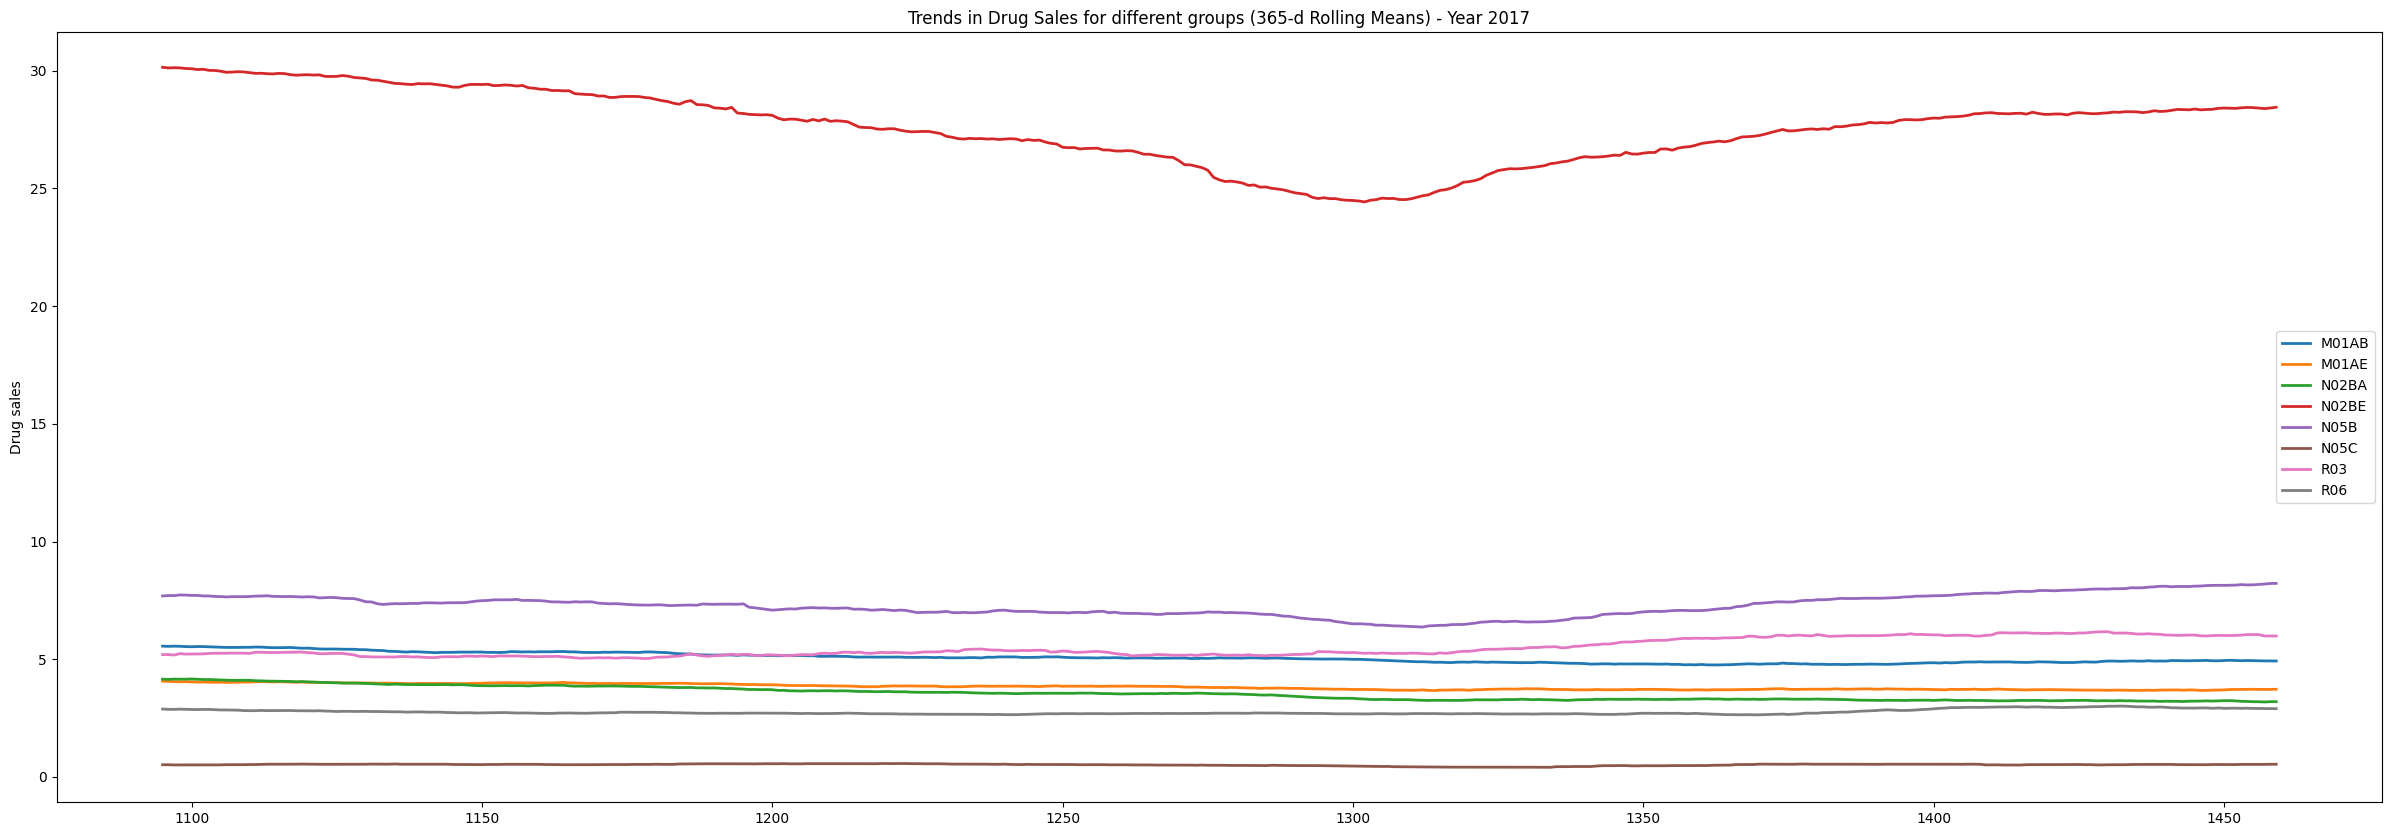

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2017 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()

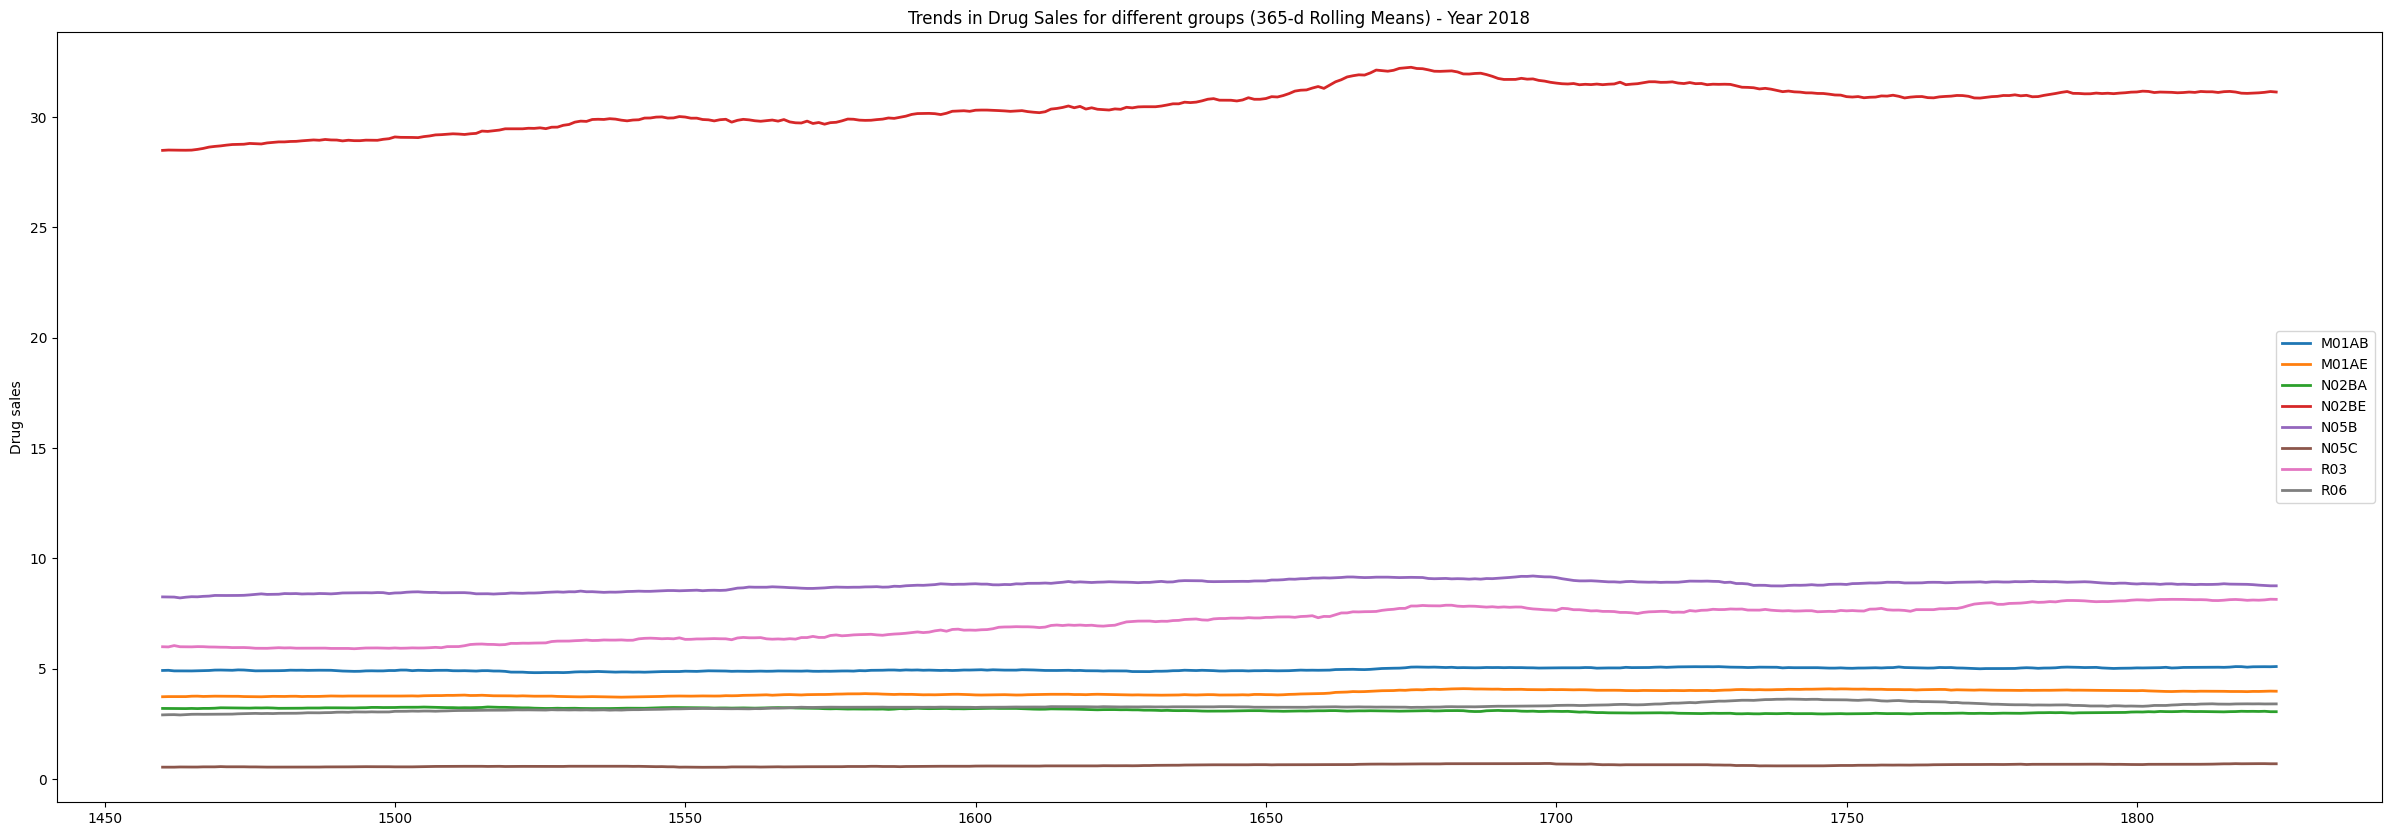

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2018 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()

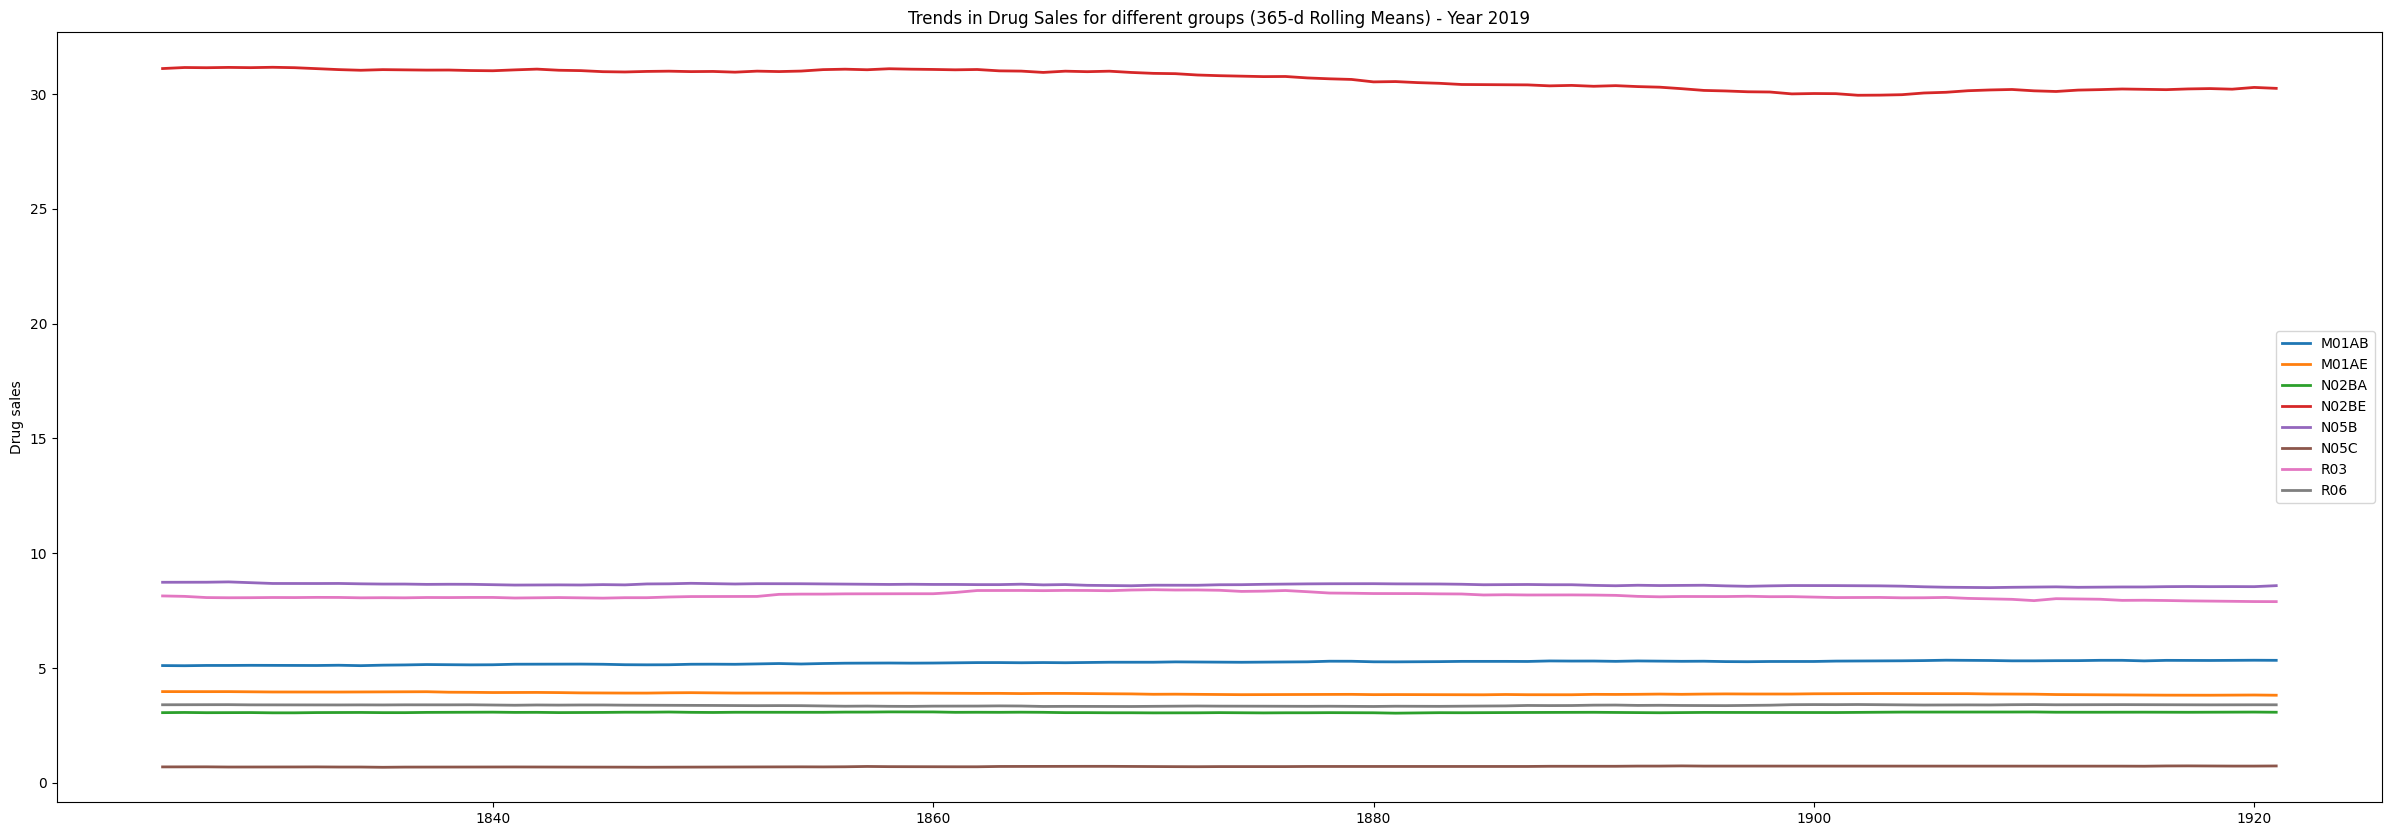

In [ ]:
import matplotlib.pyplot as plt


selected_year = 2019 # Replace with the desired year

# Filter DataFrame for the selected year
df_selected_year = dfatc_365d[df_2['Year'] == selected_year]

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))

for nm in cols_plot:
    ax.plot(df_selected_year[nm], label=nm, linewidth=2)

ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title(f'Trends in Drug Sales for different groups (365-d Rolling Means) - Year {selected_year}')
plt.show()

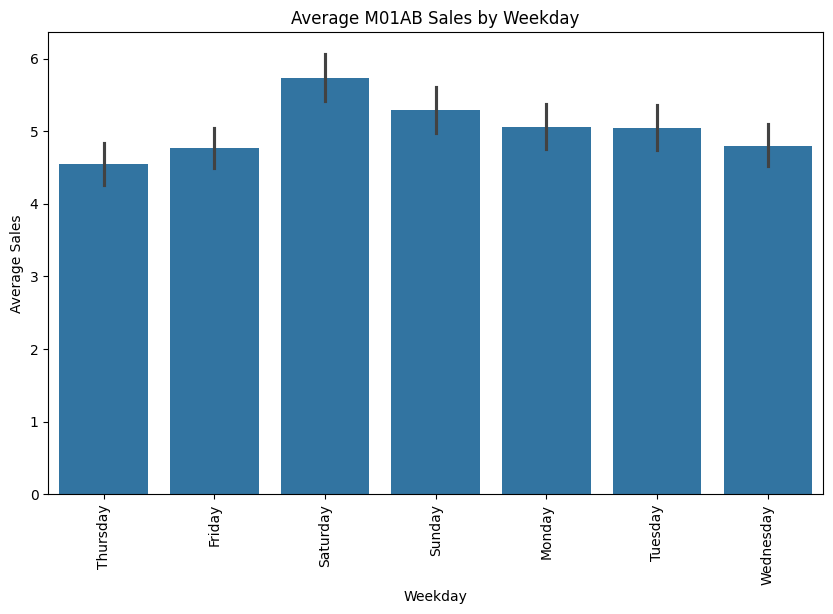

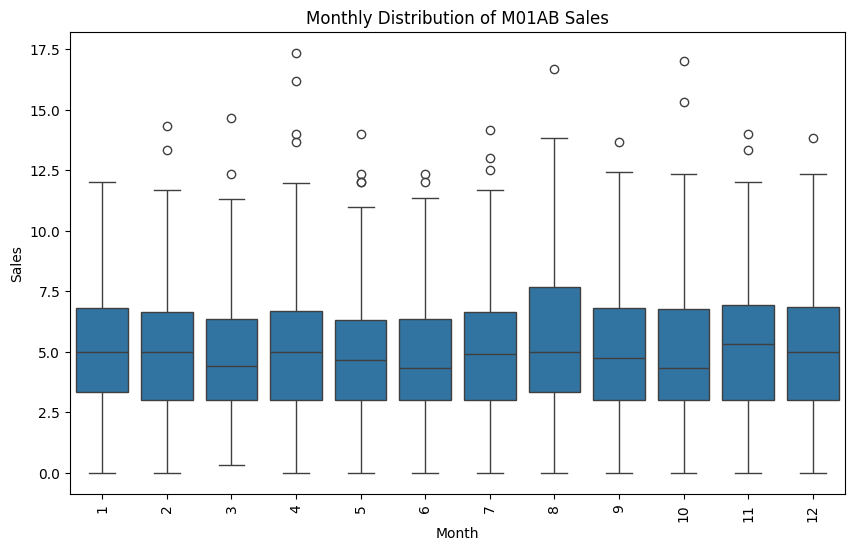

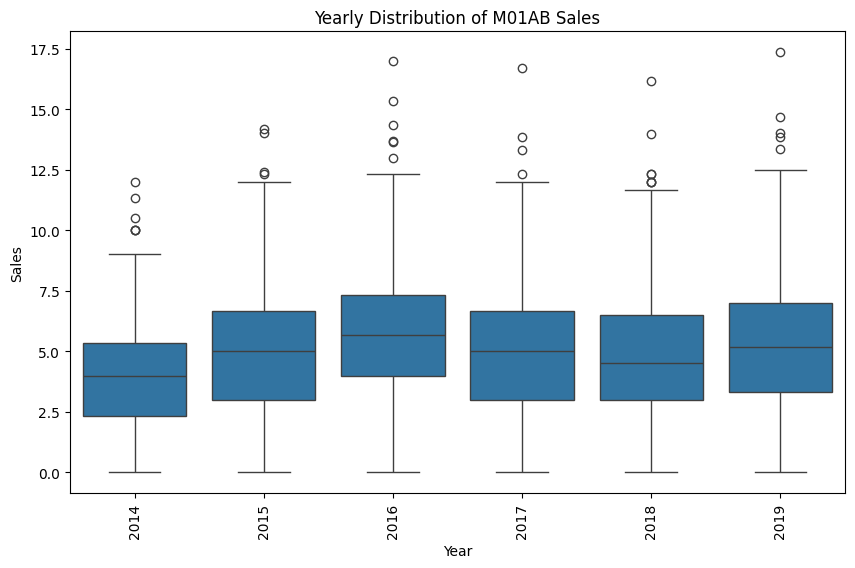

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='M01AB', data=df_2)
plt.title('Average M01AB Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='M01AB', data=df_2)
plt.title('Monthly Distribution of M01AB Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='M01AB', data=df_2)
plt.title('Yearly Distribution of M01AB Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

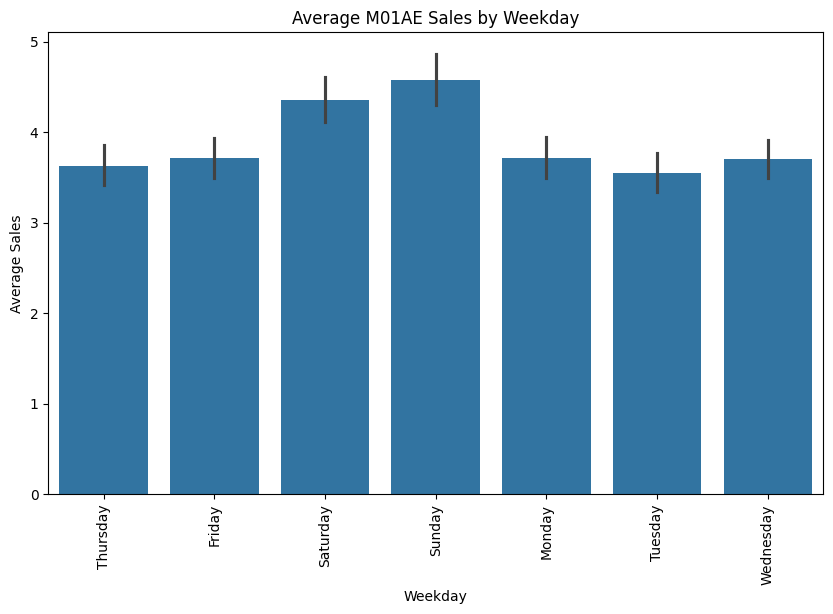

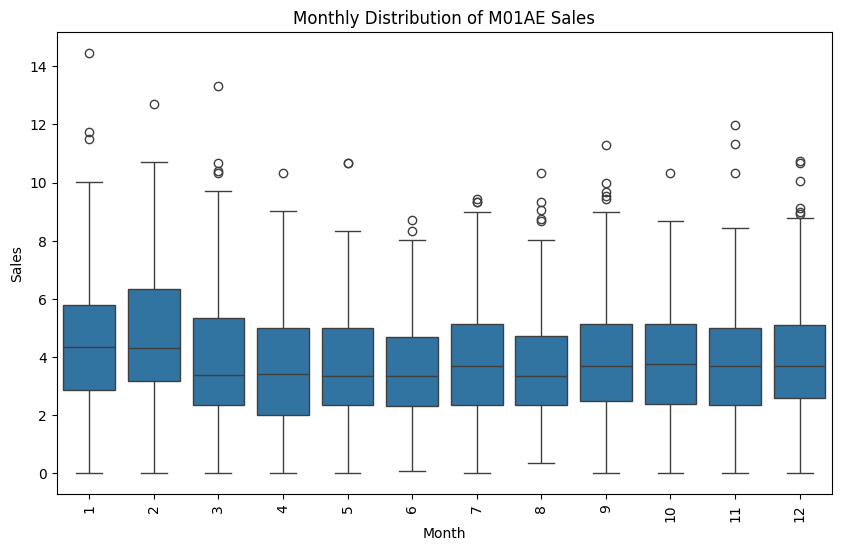

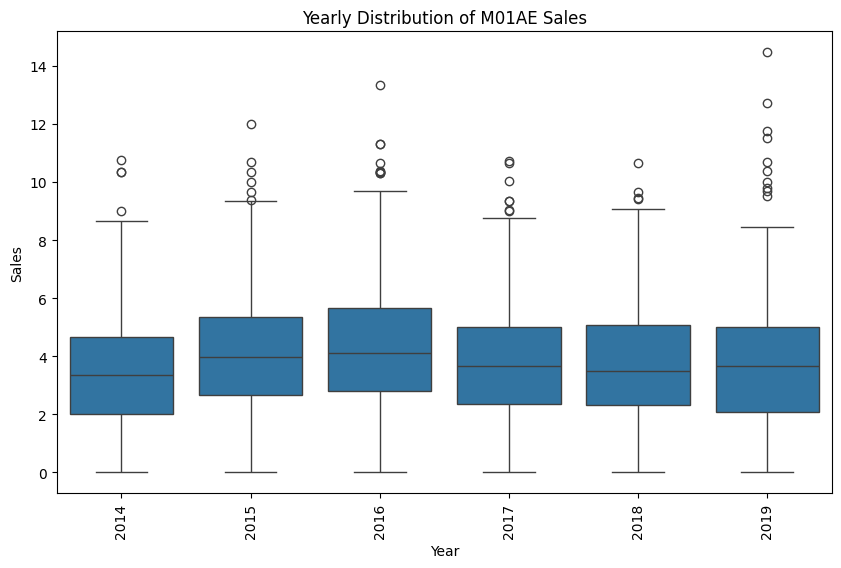

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='M01AE', data=df_2)
plt.title('Average M01AE Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='M01AE', data=df_2)
plt.title('Monthly Distribution of M01AE Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='M01AE', data=df_2)
plt.title('Yearly Distribution of M01AE Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

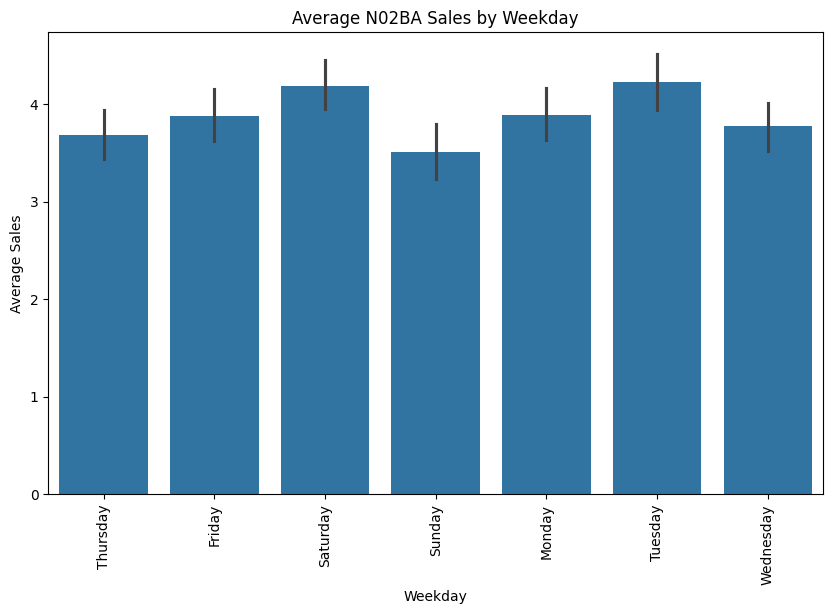

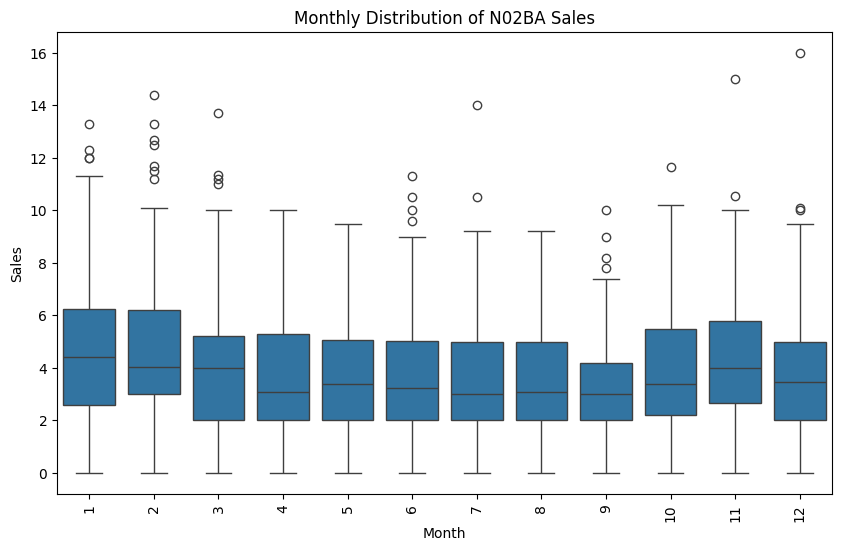

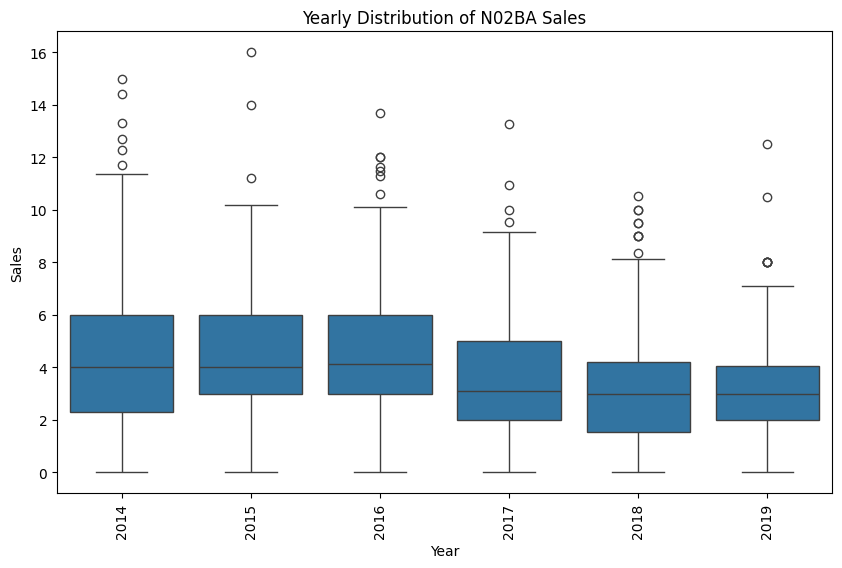

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='N02BA', data=df_2)
plt.title('Average N02BA Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='N02BA', data=df_2)
plt.title('Monthly Distribution of N02BA Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='N02BA', data=df_2)
plt.title('Yearly Distribution of N02BA Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

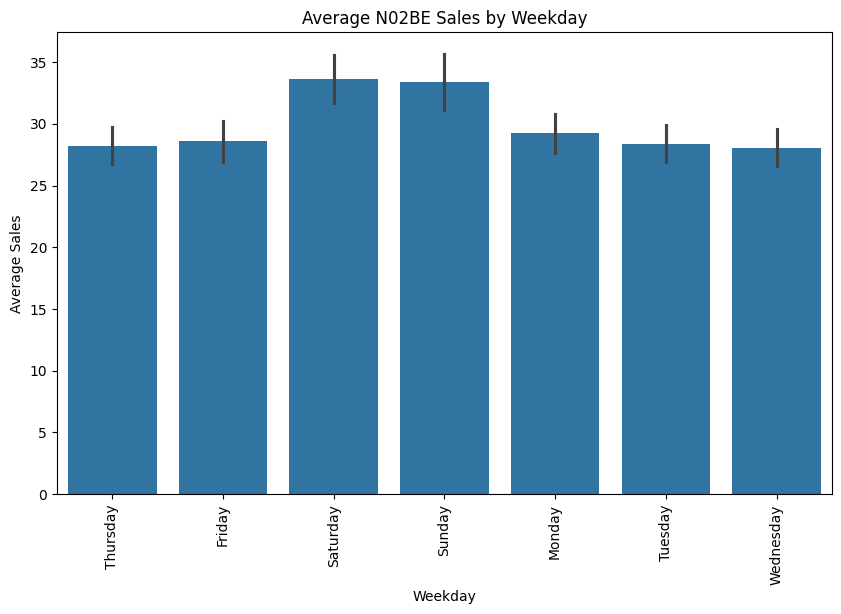

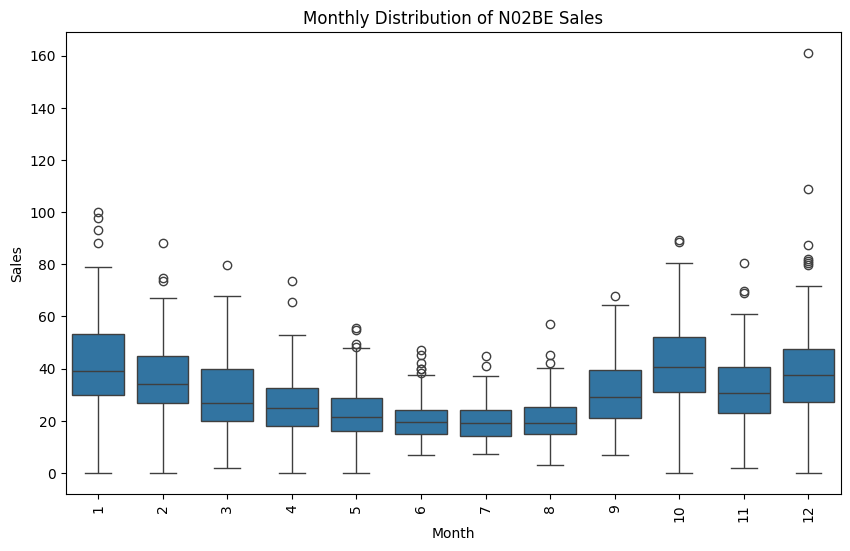

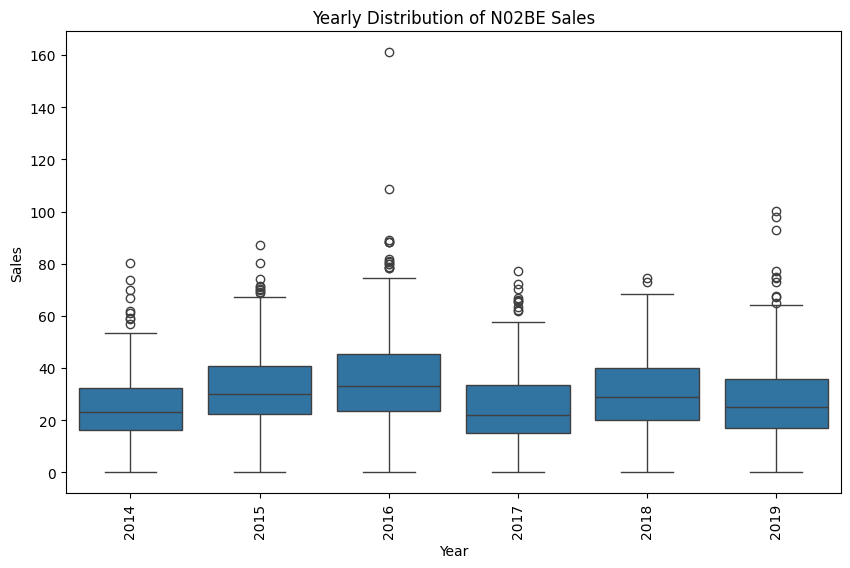

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='N02BE', data=df_2)
plt.title('Average N02BE Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='N02BE', data=df_2)
plt.title('Monthly Distribution of N02BE Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='N02BE', data=df_2)
plt.title('Yearly Distribution of N02BE Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

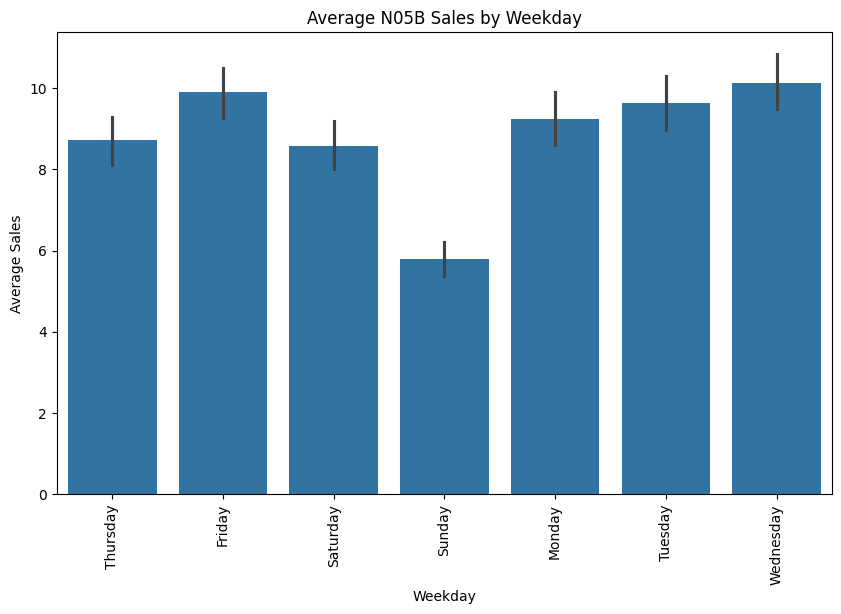

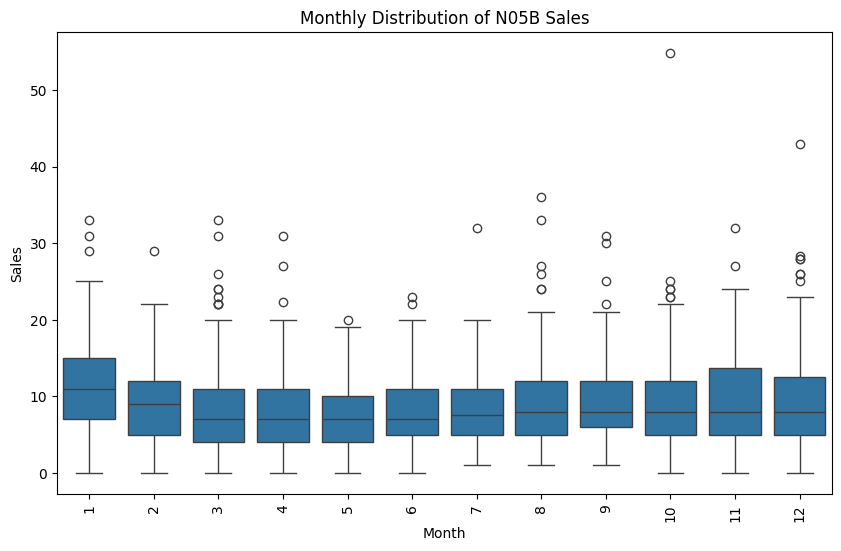

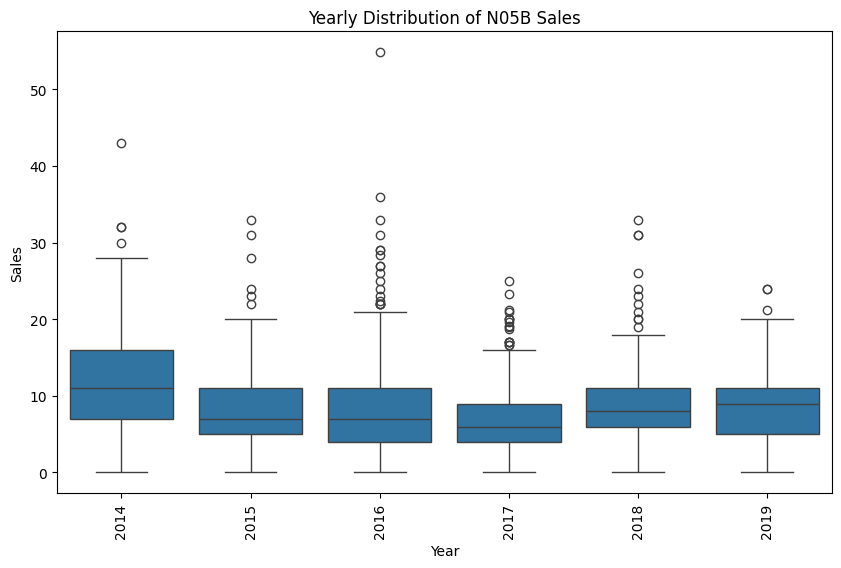

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='N05B', data=df_2)
plt.title('Average N05B Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='N05B', data=df_2)
plt.title('Monthly Distribution of N05B Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='N05B', data=df_2)
plt.title('Yearly Distribution of N05B Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

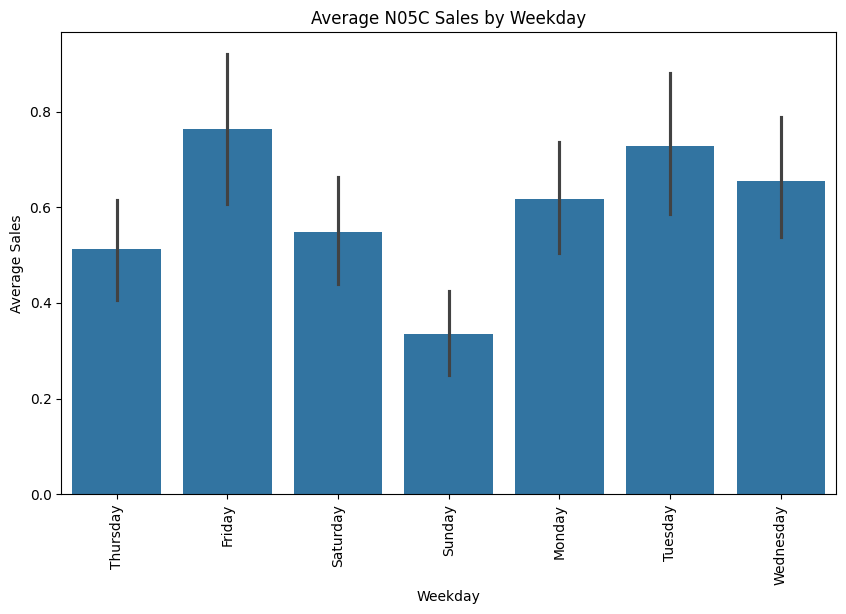

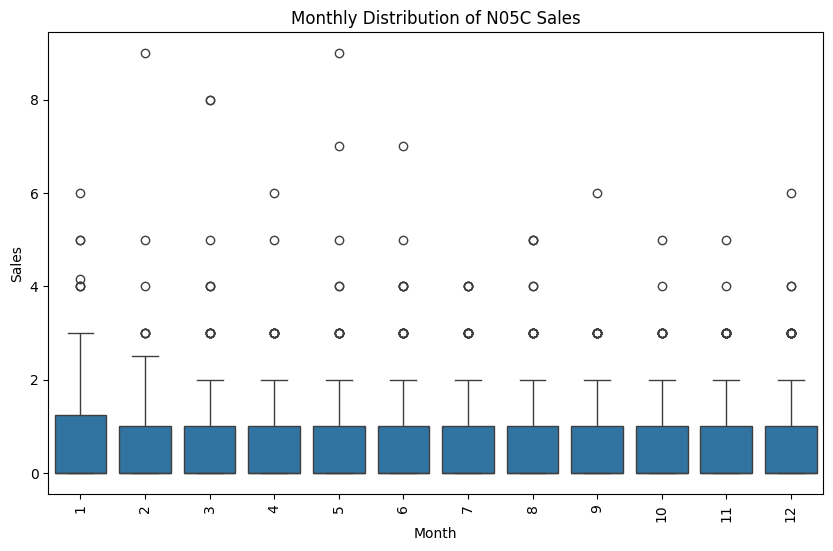

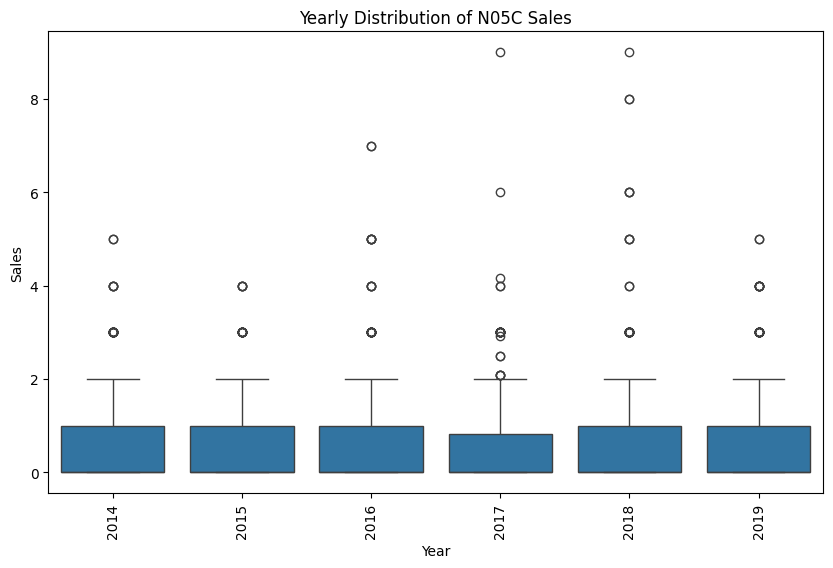

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='N05C', data=df_2)
plt.title('Average N05C Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='N05C', data=df_2)
plt.title('Monthly Distribution of N05C Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='N05C', data=df_2)
plt.title('Yearly Distribution of N05C Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

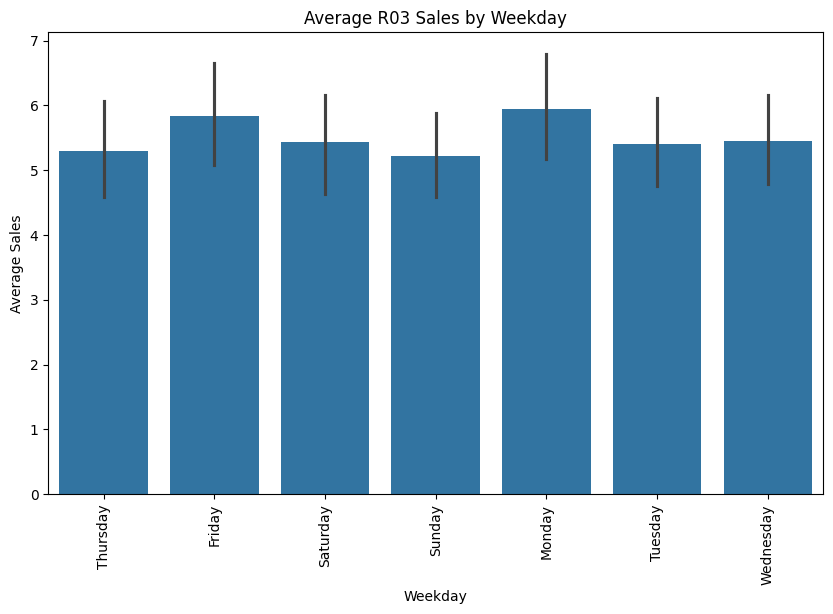

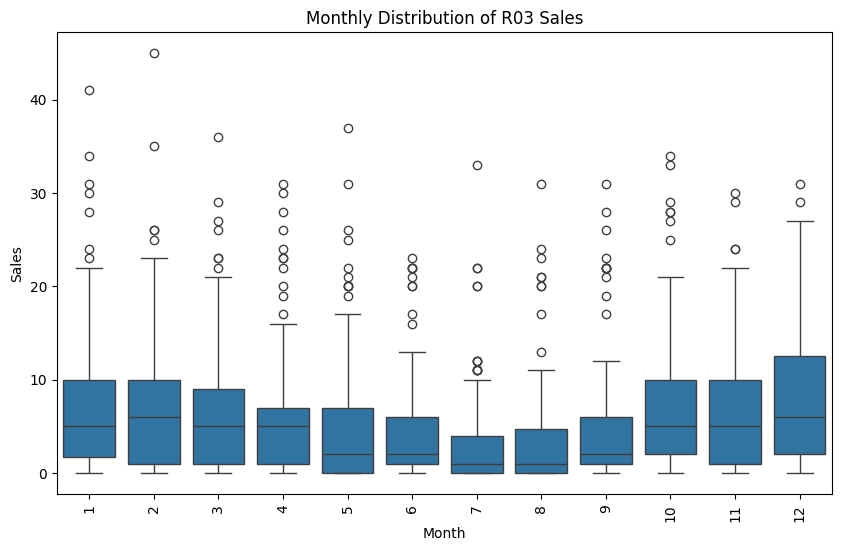

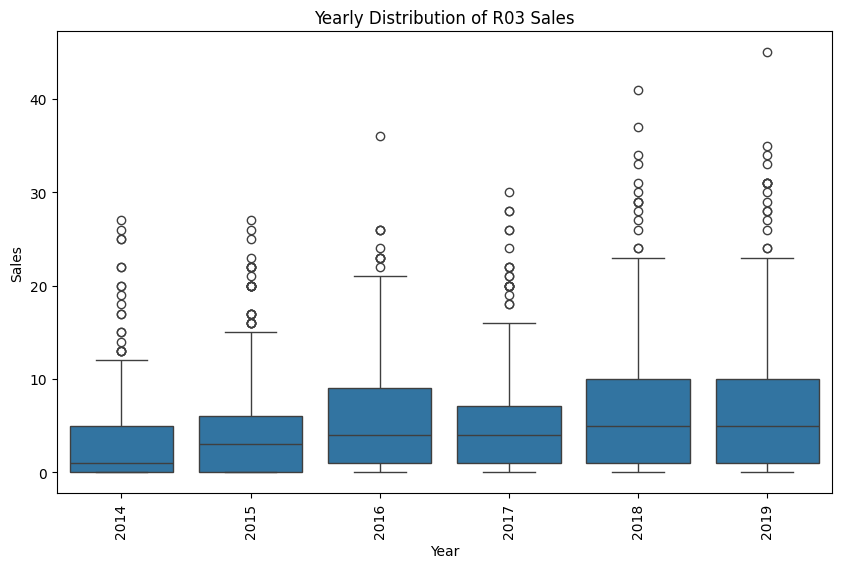

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='R03', data=df_2)
plt.title('Average R03 Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='R03', data=df_2)
plt.title('Monthly Distribution of R03 Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='R03', data=df_2)
plt.title('Yearly Distribution of R03 Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

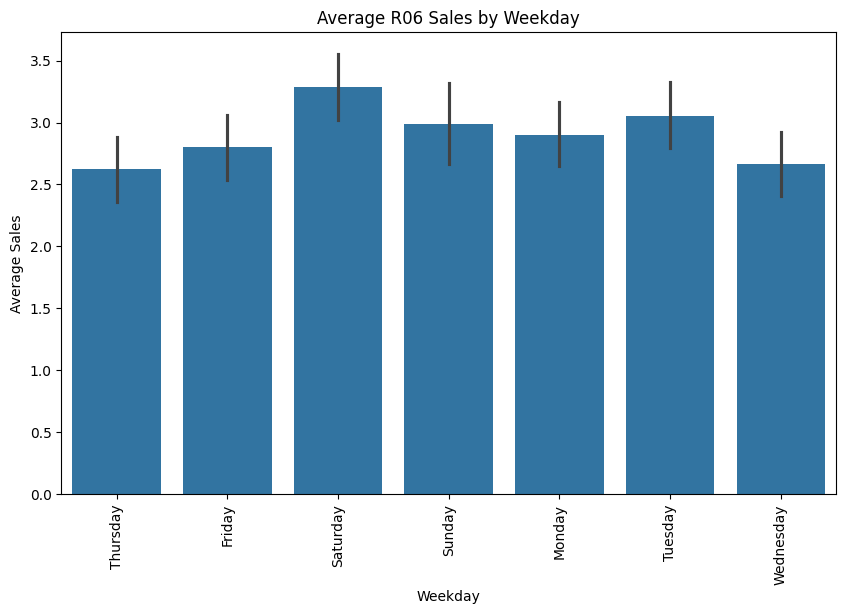

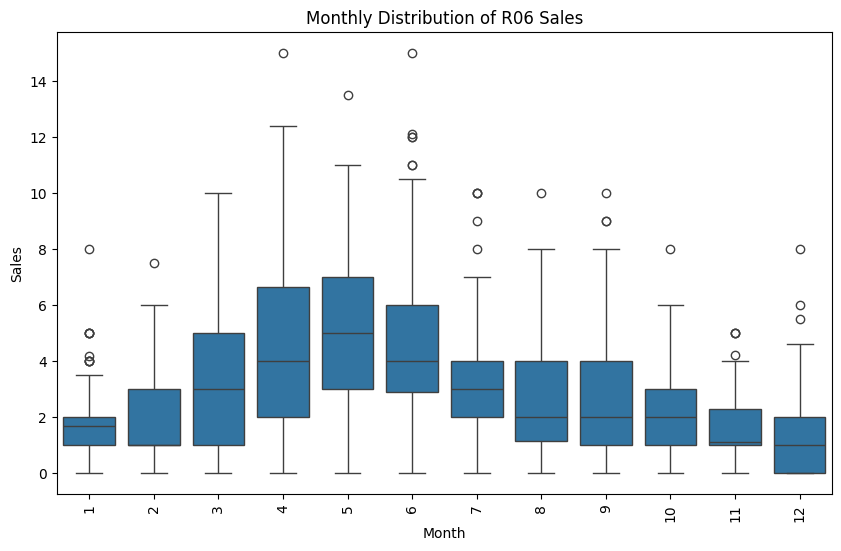

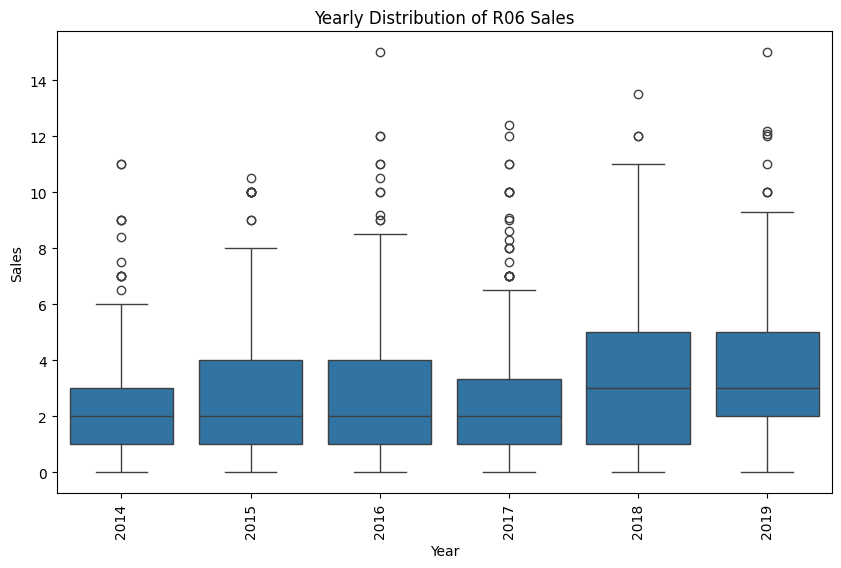

In [ ]:



# Sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday Name', y='R06', data=df_2)
plt.title('Average R06 Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='R06', data=df_2)
plt.title('Monthly Distribution of R06 Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

# Sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='R06', data=df_2)
plt.title('Yearly Distribution of R06 Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
# Rotate x-labels vertically
plt.xticks(rotation=90)
plt.show()

**Model Creation**

In [ ]:
df_2

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  \
0    2014-01-02   0.00  3.670   3.40  32.40   7.0   0.0   0.0  2.0  2014   
1    2014-01-03   8.00  4.000   4.40  50.60  16.0   0.0  20.0  4.0  2014   
2    2014-01-04   2.00  1.000   6.50  61.85  10.0   0.0   9.0  1.0  2014   
3    2014-01-05   4.00  3.000   7.00  41.10   8.0   0.0   3.0  0.0  2014   
4    2014-01-06   5.00  1.000   4.50  21.70  16.0   2.0   6.0  2.0  2014   
...         ...    ...    ...    ...    ...   ...   ...   ...  ...   ...   
2099 2019-10-02   5.18  3.274   2.80  30.20   9.0   1.0   0.0  1.1  2019   
2100 2019-10-03   5.00  3.000   4.00  40.40  10.0   0.0   2.0  2.0  2019   
2101 2019-10-04   7.34  5.683   2.25  22.45  13.0   0.0   1.0  1.0  2019   
2102 2019-10-07   7.34  4.507   3.00  50.80   6.0   0.0  10.0  1.0  2019   
2103 2019-10-08   0.33  1.730   0.50  44.30  20.0   2.0   2.0  0.0  2019   

      Month  Hour Weekday Name   Total  
0         1   248     Thursday  39.470  
1         1   276       Friday  67.000  
2         1   276     Saturday  71.350  
3         1   276       Sunday  55.100  
4         1   276       Monday  32.200  
...     ...   ...          ...     ...  
2099     10   276    Wednesday  41.454  
2100     10   276     Thursday  52.400  
2101     10   276       Friday  37.723  
2102     10   276       Monday  65.647  
2103     10   190      Tuesday  46.860  

[2104 rows x 14 columns]

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2104 non-null   datetime64[ns]
 1   M01AB         2104 non-null   float64       
 2   M01AE         2104 non-null   float64       
 3   N02BA         2104 non-null   float64       
 4   N02BE         2104 non-null   float64       
 5   N05B          2104 non-null   float64       
 6   N05C          2104 non-null   float64       
 7   R03           2104 non-null   float64       
 8   R06           2104 non-null   float64       
 9   Year          2104 non-null   int64         
 10  Month         2104 non-null   int64         
 11  Hour          2104 non-null   int64         
 12  Weekday Name  2104 non-null   object        
 13  Total         2104 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 230.2+ KB


# **LSTM MODEL**

setting datumn column as index

In [ ]:
df3=df_2[['datum','M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']]

In [ ]:
df3.set_index('datum', inplace=True)

In [ ]:
df3

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06
datum                                                        
2014-01-02   0.00  3.670   3.40  32.40   7.0   0.0   0.0  2.0
2014-01-03   8.00  4.000   4.40  50.60  16.0   0.0  20.0  4.0
2014-01-04   2.00  1.000   6.50  61.85  10.0   0.0   9.0  1.0
2014-01-05   4.00  3.000   7.00  41.10   8.0   0.0   3.0  0.0
2014-01-06   5.00  1.000   4.50  21.70  16.0   2.0   6.0  2.0
...           ...    ...    ...    ...   ...   ...   ...  ...
2019-10-02   5.18  3.274   2.80  30.20   9.0   1.0   0.0  1.1
2019-10-03   5.00  3.000   4.00  40.40  10.0   0.0   2.0  2.0
2019-10-04   7.34  5.683   2.25  22.45  13.0   0.0   1.0  1.0
2019-10-07   7.34  4.507   3.00  50.80   6.0   0.0  10.0  1.0
2019-10-08   0.33  1.730   0.50  44.30  20.0   2.0   2.0  0.0

[2104 rows x 8 columns]

In [ ]:
# setting a list of medicine categories
med_categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

In [ ]:
#Creating Dictionary to store results
results = {}

In [ ]:
#Setting Model parameters
n_inputs = 365
n_features = 1

In [ ]:
#using for loop to create model for each drug in  med_categories variable

for category in med_categories:

    # Using train_test_split to split data into 80% training and 20% testing
    lstm_train_cat, lstm_test_cat = train_test_split(df3[category].values.reshape(-1, 1), test_size=0.2, shuffle=False)

    # Scale the data using minmaxscaler
    scaler_cat = MinMaxScaler()
    scaler_cat.fit(lstm_train_cat)
    scaled_train_cat = scaler_cat.transform(lstm_train_cat)
    scaled_test_cat = scaler_cat.transform(lstm_test_cat)

    # Generate time series data
    generator_cat = TimeseriesGenerator(scaled_train_cat, scaled_train_cat, length=n_inputs, batch_size=1)

    # Define and train the model
    model_cat = Sequential()
    model_cat.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_inputs, n_features)))
    model_cat.add(LSTM(50, activation='relu'))
    model_cat.add(Dense(1))
    model_cat.compile(optimizer='adam', loss='mse')
    model_cat.fit(generator_cat, epochs=5, batch_size=2, verbose=0)

    # Prepare test data
    test_prediction_cat = []
    first_eval_batch_cat = scaled_train_cat[-365:]
    current_batch_cat = first_eval_batch_cat.reshape(1, 365, 1)

    # Generate predictions
    for i in range(len(lstm_test_cat)):
        current_pred_cat = model_cat.predict(current_batch_cat)
        test_prediction_cat.append(current_pred_cat)
        current_batch_cat = np.append(current_batch_cat[:, 1:, :], [current_pred_cat], axis=1)

    # Convert and inverse transform predictions
    test_prediction_cat = np.array(test_prediction_cat).reshape(-1, 1)
    prediction_cat = scaler_cat.inverse_transform(test_prediction_cat)

    # Calculate MAPE and MSE
    mape_cat = mean_absolute_percentage_error(lstm_test_cat, test_prediction_cat)
    mse_cat = mean_squared_error(lstm_test_cat, test_prediction_cat)

    # Store results
    results[category] = {'LSTM MAPE': mape_cat, 'LSTM MSE': mse_cat}


1/1 [==============================] - 0s 89ms/step


In [ ]:
model_cat.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 365, 100)          40800     
                                                                 
 lstm_15 (LSTM)              (None, 50)                30200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71051 (277.54 KB)
Trainable params: 71051 (277.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Print results
for category, metrics in results.items():
    print(f"Category: {category}, MAPE: {metrics['LSTM MAPE']}, MSE: {metrics['LSTM MSE']}")

Category: M01AB, MAPE: 26719649247164.797, MSE: 32.6173699092454
Category: M01AE, MAPE: 29097897802570.46, MSE: 17.412744000473264
Category: N02BA, MAPE: 71645209605741.08, MSE: 11.37642561548365
Category: N02BE, MAPE: 20676296152004.168, MSE: 1165.3992482130486
Category: N05B, MAPE: 9584830673957.45, MSE: 88.49457017029289
Category: N05C, MAPE: 152984997545765.47, MSE: 1.6313927578754361
Category: R03, MAPE: 89207079180994.19, MSE: 125.37151286683302
Category: R06, MAPE: 155692231964346.88, MSE: 15.216887464128025


# **ARIMA MODEL**

In [ ]:
df7=df_2[['datum','M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']]

In [ ]:

# Split data into train and test sets
train_size = int(len(df7) * 0.8)
train, test = df7.iloc[:train_size], df7.iloc[train_size:]

In [ ]:
# Grid search parameters
p_values = range(0, 3)  # Example range, adjust as needed
d_values = range(0, 2)  # Example range, adjust as needed
q_values = range(0, 3)  # Example range, adjust as needed

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



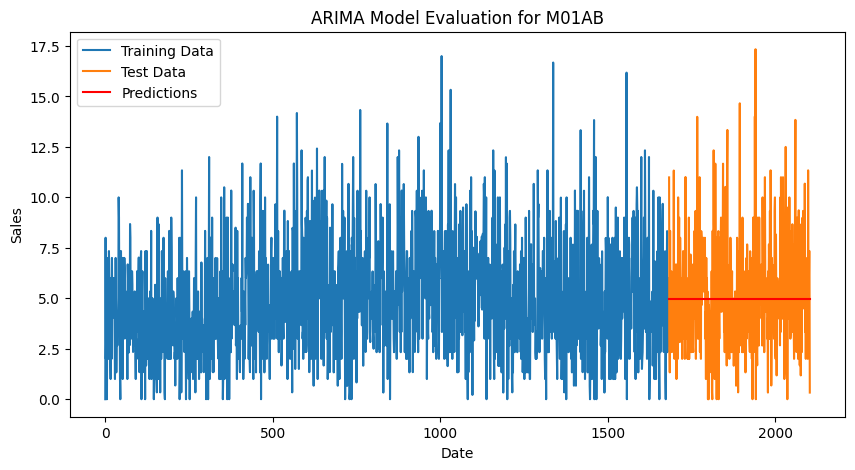

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sa

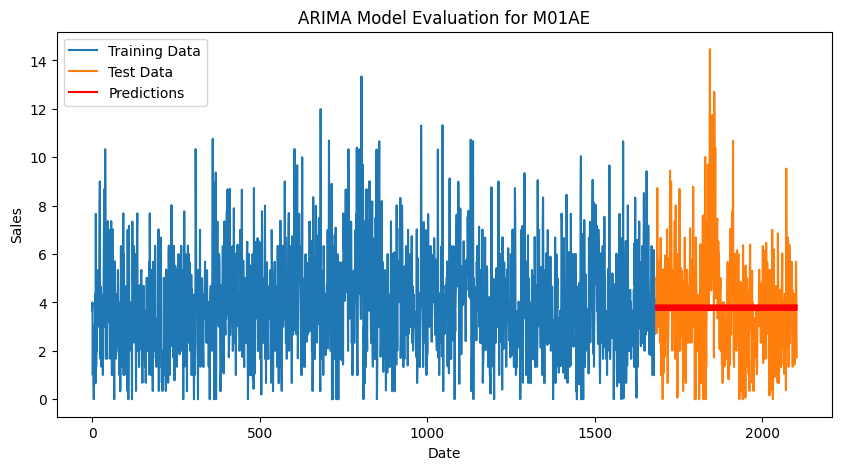

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sa

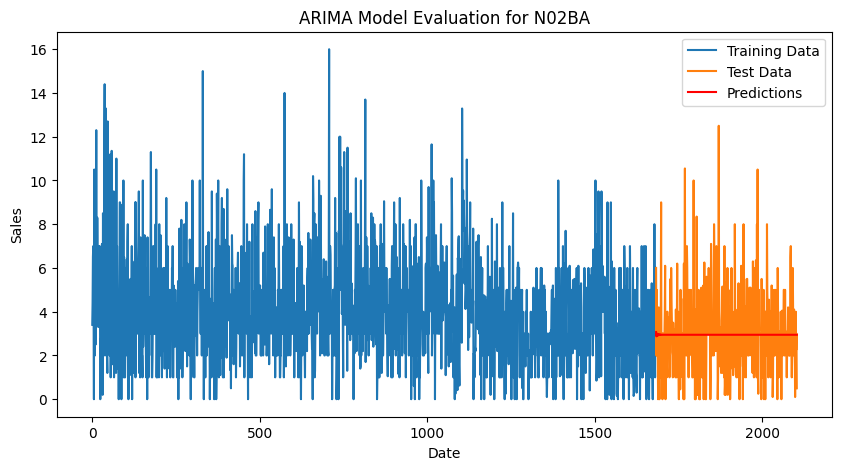

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

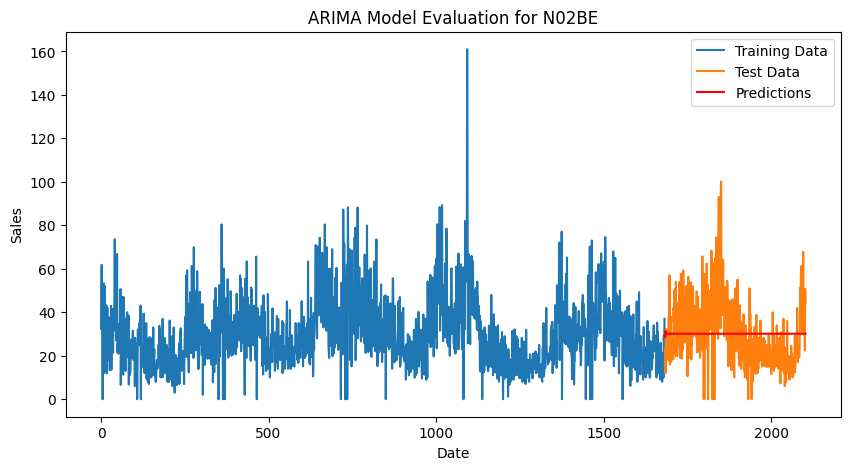

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sa

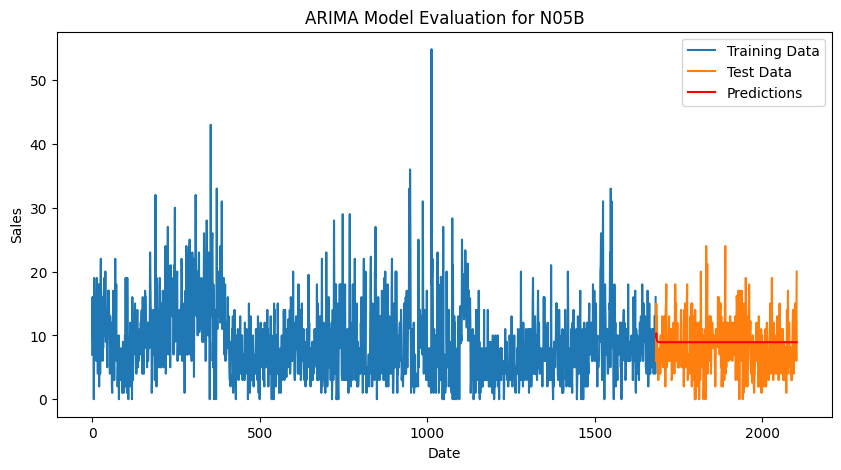

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:



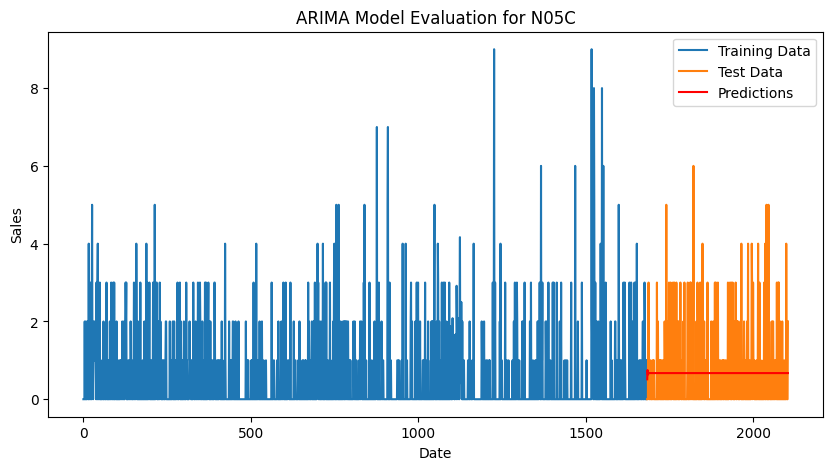

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



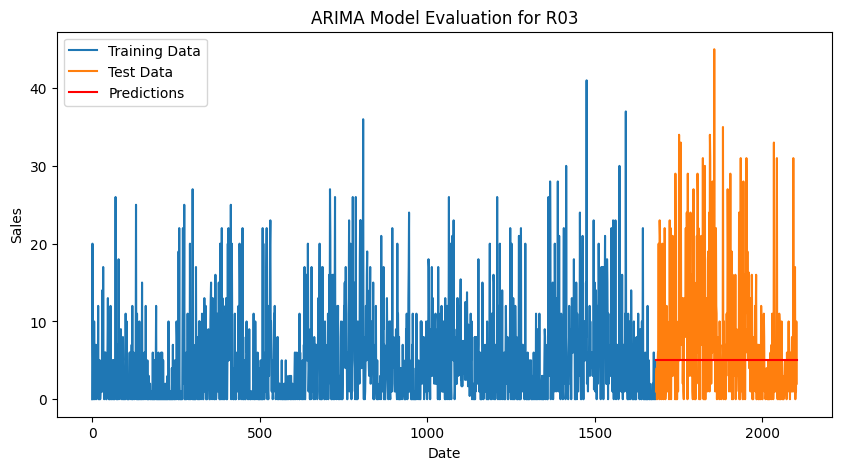

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



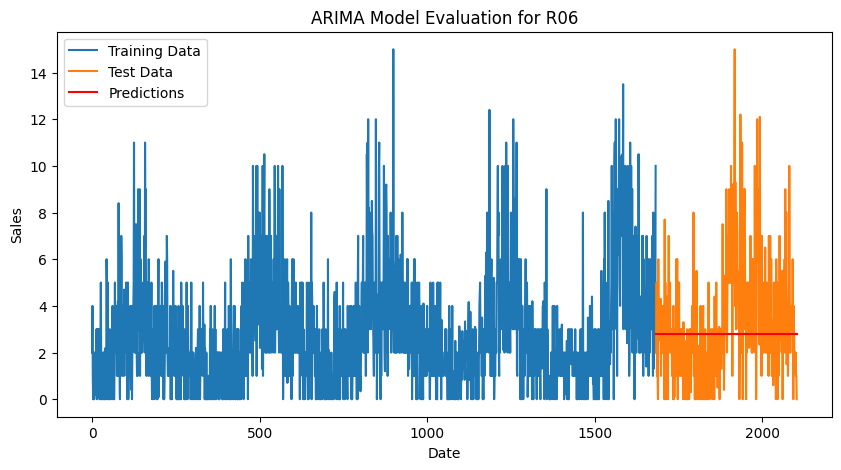

Drug: M01AB, Best Arima Params: (0, 0, 0), Best Arima RMSE: 2.83, Best Arima MSE: 8.01
Drug: M01AE, Best Arima Params: (1, 1, 2), Best Arima RMSE: 2.23, Best Arima MSE: 4.98
Drug: N02BA, Best Arima Params: (2, 1, 2), Best Arima RMSE: 1.95, Best Arima MSE: 3.80
Drug: N02BE, Best Arima Params: (2, 1, 0), Best Arima RMSE: 15.81, Best Arima MSE: 249.87
Drug: N05B, Best Arima Params: (2, 0, 0), Best Arima RMSE: 4.22, Best Arima MSE: 17.77
Drug: N05C, Best Arima Params: (1, 1, 0), Best Arima RMSE: 1.10, Best Arima MSE: 1.22
Drug: R03, Best Arima Params: (0, 1, 0), Best Arima RMSE: 8.64, Best Arima MSE: 74.66
Drug: R06, Best Arima Params: (0, 0, 0), Best Arima RMSE: 2.57, Best Arima MSE: 6.63


In [ ]:

# Model fitting and evaluation for each drug with grid search
best_model_params = {}    #store the best parameters, RMSE, and MSE for each drug.

for column in df7.columns:
    if column != 'date':  # Skip the 'date' column---->This condition checks if the current column is not named 'date
        best_rmse_drug = float('inf') #hold the best RMSE value and corresponding parameters for each drug, respectively.
        best_params_drug = None       #   ,,                            ,,                        ,,

        for p in p_values:
            for d in d_values:
                for q in q_values:
                    try:
                        # Model fitting
                        model = ARIMA(train[column], order=(p, d, q))
                        model_fit = model.fit()

                        # Evaluate the model
                        train_predictions = model_fit.predict(start=train.index[0], end=train.index[-1])
                        test_predictions = model_fit.forecast(steps=len(test))

                        # Calculate RMSE
                        test_rmse = np.sqrt(mean_squared_error(test[column], test_predictions))

                        # Update best parameters if RMSE improves
                        if test_rmse < best_rmse_drug:
                            best_rmse_drug = test_rmse
                            best_params_drug = (p, d, q)

                    except:
                        continue

        if best_params_drug is not None:
            # Fit the best model for the drug with the best parameters
            best_model = ARIMA(train[column], order=best_params_drug)
            best_model_fit = best_model.fit()

            # Calculate MSE for the best model
            train_predictions_best = best_model_fit.predict(start=train.index[0], end=train.index[-1])
            test_predictions_best = best_model_fit.forecast(steps=len(test))
            test_mse_best = mean_squared_error(test[column], test_predictions_best)

            # Store the best parameters, RMSE, and MSE for the drug
            best_model_params[column] = {'best_params': best_params_drug, 'best_rmse': best_rmse_drug, 'best_mse': test_mse_best}

            # Plot the results
            plt.figure(figsize=(10, 5))
            plt.plot(train.index, train[column], label='Training Data')
            plt.plot(test.index, test[column], label='Test Data')
            plt.plot(test.index, best_model_fit.forecast(steps=len(test)), label='Predictions', color='red')
            plt.xlabel('Date')
            plt.ylabel('Sales')
            plt.title(f'ARIMA Model Evaluation for {column}')
            plt.legend()
            plt.show()

# Print the best parameters, RMSE, and MSE for each drug
for drug, params in best_model_params.items():
    print(f'Drug: {drug}, Best Arima Params: {params["best_params"]}, Best Arima RMSE: {params["best_rmse"]:.2f}, Best Arima MSE: {params["best_mse"]:.2f}')





# **PROPHET MODEL**

In [ ]:
df_2

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  \
0    2014-01-02   0.00  3.670   3.40  32.40   7.0   0.0   0.0  2.0  2014   
1    2014-01-03   8.00  4.000   4.40  50.60  16.0   0.0  20.0  4.0  2014   
2    2014-01-04   2.00  1.000   6.50  61.85  10.0   0.0   9.0  1.0  2014   
3    2014-01-05   4.00  3.000   7.00  41.10   8.0   0.0   3.0  0.0  2014   
4    2014-01-06   5.00  1.000   4.50  21.70  16.0   2.0   6.0  2.0  2014   
...         ...    ...    ...    ...    ...   ...   ...   ...  ...   ...   
2099 2019-10-02   5.18  3.274   2.80  30.20   9.0   1.0   0.0  1.1  2019   
2100 2019-10-03   5.00  3.000   4.00  40.40  10.0   0.0   2.0  2.0  2019   
2101 2019-10-04   7.34  5.683   2.25  22.45  13.0   0.0   1.0  1.0  2019   
2102 2019-10-07   7.34  4.507   3.00  50.80   6.0   0.0  10.0  1.0  2019   
2103 2019-10-08   0.33  1.730   0.50  44.30  20.0   2.0   2.0  0.0  2019   

      Month  Hour Weekday Name   Total  
0         1   248     Thursday  39.470  
1         1   276       Friday  67.000  
2         1   276     Saturday  71.350  
3         1   276       Sunday  55.100  
4         1   276       Monday  32.200  
...     ...   ...          ...     ...  
2099     10   276    Wednesday  41.454  
2100     10   276     Thursday  52.400  
2101     10   276       Friday  37.723  
2102     10   276       Monday  65.647  
2103     10   190      Tuesday  46.860  

[2104 rows x 14 columns]

In [ ]:
#creating New dataframe
df6=df_2[['datum','M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']]


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   2104 non-null   datetime64[ns]
 1   M01AB   2104 non-null   float64       
 2   M01AE   2104 non-null   float64       
 3   N02BA   2104 non-null   float64       
 4   N02BE   2104 non-null   float64       
 5   N05B    2104 non-null   float64       
 6   N05C    2104 non-null   float64       
 7   R03     2104 non-null   float64       
 8   R06     2104 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 148.1 KB


In [ ]:
# renaming 'datum' column   to 'ds'
df6.rename(columns={'datum': 'ds'}, inplace=True)

<ipython-input-155-bfbd23c2e174>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df6

ds  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06
0    2014-01-02   0.00  3.670   3.40  32.40   7.0   0.0   0.0  2.0
1    2014-01-03   8.00  4.000   4.40  50.60  16.0   0.0  20.0  4.0
2    2014-01-04   2.00  1.000   6.50  61.85  10.0   0.0   9.0  1.0
3    2014-01-05   4.00  3.000   7.00  41.10   8.0   0.0   3.0  0.0
4    2014-01-06   5.00  1.000   4.50  21.70  16.0   2.0   6.0  2.0
...         ...    ...    ...    ...    ...   ...   ...   ...  ...
2099 2019-10-02   5.18  3.274   2.80  30.20   9.0   1.0   0.0  1.1
2100 2019-10-03   5.00  3.000   4.00  40.40  10.0   0.0   2.0  2.0
2101 2019-10-04   7.34  5.683   2.25  22.45  13.0   0.0   1.0  1.0
2102 2019-10-07   7.34  4.507   3.00  50.80   6.0   0.0  10.0  1.0
2103 2019-10-08   0.33  1.730   0.50  44.30  20.0   2.0   2.0  0.0

[2104 rows x 9 columns]

In [ ]:
# Specify the drug sales columns
drug_sales_columns = df6[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

In [ ]:
# Define a list to store MSE values for each drug sales column
mse_list = []


In [ ]:
# Iterate over each drug sales column
for column in drug_sales_columns:
    print(f"Calculating MSE for column: {column}")

    # Extract the data for the current column and rename columns
    data = df6[['ds', column]].rename(columns={column: 'y'})

    # Split the dataset into training and validation sets
    train_size = int(len(data) * 0.8)
    train_data = data.iloc[:train_size]
    validation_data = data.iloc[train_size:]

    # Initialize Prophet model
    model = Prophet(yearly_seasonality=False)  # Disable yearly seasonality to avoid potential overfitting
    model.add_seasonality(name='yearly', period=365.25, fourier_order=10)  # Add custom yearly seasonality

    # Fit Prophet model
    model.fit(train_data)

    # Make predictions
    forecast = model.predict(validation_data)

    # Calculate MSE
    mse = mean_squared_error(validation_data['y'].values, forecast['yhat'].values)

    # Append MSE to the mse_list
    mse_list.append(mse)

    # Print MSE for the current column
    print("MSE for", column, ":", mse)

Calculating MSE for column: M01AB


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/16db07s1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/8gf5c70c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3204', 'data', 'file=/tmp/tmp07eeg990/16db07s1.json', 'init=/tmp/tmp07eeg990/8gf5c70c.json', 'output', 'file=/tmp/tmp07eeg990/prophet_modele2q0tsfi/prophet_model-20240429104455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07e

MSE for M01AB : 8.581928051140846
Calculating MSE for column: M01AE


10:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/pidkql9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/jo53kst2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41059', 'data', 'file=/tmp/tmp07eeg990/pidkql9f.json', 'init=/tmp/tmp07eeg990/jo53kst2.json', 'output', 'file=/tmp/tmp07eeg990/prophet_model2rxr_cpw/prophet_model-20240429104456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for M01AE : 4.649740890553536
Calculating MSE for column: N02BA


10:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/soej6fpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/af4iilen.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38879', 'data', 'file=/tmp/tmp07eeg990/soej6fpq.json', 'init=/tmp/tmp07eeg990/af4iilen.json', 'output', 'file=/tmp/tmp07eeg990/prophet_model7_hvma7z/prophet_model-20240429104457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for N02BA : 4.3708686635416925
Calculating MSE for column: N02BE


10:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/7supofe_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/gl0go9fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53307', 'data', 'file=/tmp/tmp07eeg990/7supofe_.json', 'init=/tmp/tmp07eeg990/gl0go9fx.json', 'output', 'file=/tmp/tmp07eeg990/prophet_modelt4igiq6x/prophet_model-20240429104457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for N02BE : 177.73256121815768
Calculating MSE for column: N05B


10:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/bkw33s1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/jpbi1qng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=436', 'data', 'file=/tmp/tmp07eeg990/bkw33s1f.json', 'init=/tmp/tmp07eeg990/jpbi1qng.json', 'output', 'file=/tmp/tmp07eeg990/prophet_model2mnycror/prophet_model-20240429104458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for N05B : 29.19803243168664
Calculating MSE for column: N05C


10:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/df3x0lkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/9n4odyw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29575', 'data', 'file=/tmp/tmp07eeg990/df3x0lkq.json', 'init=/tmp/tmp07eeg990/9n4odyw2.json', 'output', 'file=/tmp/tmp07eeg990/prophet_model5twsgs_4/prophet_model-20240429104458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for N05C : 1.2666726150816774
Calculating MSE for column: R03


10:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/ek94sycs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp07eeg990/f82700td.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86115', 'data', 'file=/tmp/tmp07eeg990/ek94sycs.json', 'init=/tmp/tmp07eeg990/f82700td.json', 'output', 'file=/tmp/tmp07eeg990/prophet_modelyvzw7ks5/prophet_model-20240429104459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MSE for R03 : 68.01815998238547
Calculating MSE for column: R06


10:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE for R06 : 4.9665117832838295


In [ ]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2018-08-12  3.312021    0.542053    5.528315     3.312021     3.312021   
1   2018-08-13  3.313264    0.455253    5.569838     3.313264     3.313264   
2   2018-08-14  3.314506    0.782003    5.757308     3.314506     3.314506   
3   2018-08-15  3.315749    0.146984    5.397756     3.315749     3.315749   
4   2018-08-16  3.316992    0.278348    5.079254     3.316992     3.316992   
..         ...       ...         ...         ...          ...          ...   
416 2019-10-02  3.828962    0.307895    5.105323     3.725286     3.928293   
417 2019-10-03  3.830205    0.025955    5.047334     3.726216     3.929787   
418 2019-10-04  3.831448    0.320703    5.207728     3.727147     3.931281   
419 2019-10-07  3.835176    0.406974    5.476239     3.730563     3.935260   
420 2019-10-08  3.836418    0.679333    5.667872     3.731493     3.936754   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -0.239312             -0.239312             -0.239312  0.005284   
1         -0.260101             -0.260101             -0.260101  0.002083   
2         -0.122152             -0.122152             -0.122152  0.152989   
3         -0.515099             -0.515099             -0.515099 -0.231655   
4         -0.586960             -0.586960             -0.586960 -0.299785   
..              ...                   ...                   ...       ...   
416       -1.175719             -1.175719             -1.175719 -0.231655   
417       -1.235839             -1.235839             -1.235839 -0.299785   
418       -1.060160             -1.060160             -1.060160 -0.134683   
419       -0.881256             -0.881256             -0.881256  0.002083   
420       -0.714593             -0.714593             -0.714593  0.152989   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        0.005284      0.005284 -0.244596     -0.244596     -0.244596   
1        0.002083      0.002083 -0.262184     -0.262184     -0.262184   
2        0.152989      0.152989 -0.275141     -0.275141     -0.275141   
3       -0.231655     -0.231655 -0.283444     -0.283444     -0.283444   
4       -0.299785     -0.299785 -0.287174     -0.287174     -0.287174   
..            ...           ...       ...           ...           ...   
416     -0.231655     -0.231655 -0.944064     -0.944064     -0.944064   
417     -0.299785     -0.299785 -0.936054     -0.936054     -0.936054   
418     -0.134683     -0.134683 -0.925477     -0.925477     -0.925477   
419      0.002083      0.002083 -0.883339     -0.883339     -0.883339   
420      0.152989      0.152989 -0.867582     -0.867582     -0.867582   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
416                   0.0                         0.0   
417                   0.0                         0.0   
418                   0.0                         0.0   
419                   0.0                         0.0   
420                   0.0                         0.0   

     multiplicative_terms_upper      yhat  
0                           0.0  3.072709  
1                           0.0  3.053163  
2                           0.0  3.192354  
3                           0.0  2.800650  
4                           0.0  2.730032  
..                          ...       ...  
416                         0.0  2.653243  
417                         0.0  2.594366  
418                         0.0  2.771287  
419                         0.0  2.953920  
420                         0.0  3.121825  

[421 rows x 19 columns]

In [ ]:
# Print the MSE values for each drug sales column
print("\nMSE values for each drug sales column:")
for i, column in enumerate(drug_sales_columns):
    print(f"{column}: {mse_list[i]}")



MSE values for each drug sales column:
M01AB: 8.581928051140846
M01AE: 4.649740890553536
N02BA: 4.3708686635416925
N02BE: 177.73256121815768
N05B: 29.19803243168664
N05C: 1.2666726150816774
R03: 68.01815998238547
R06: 4.9665117832838295


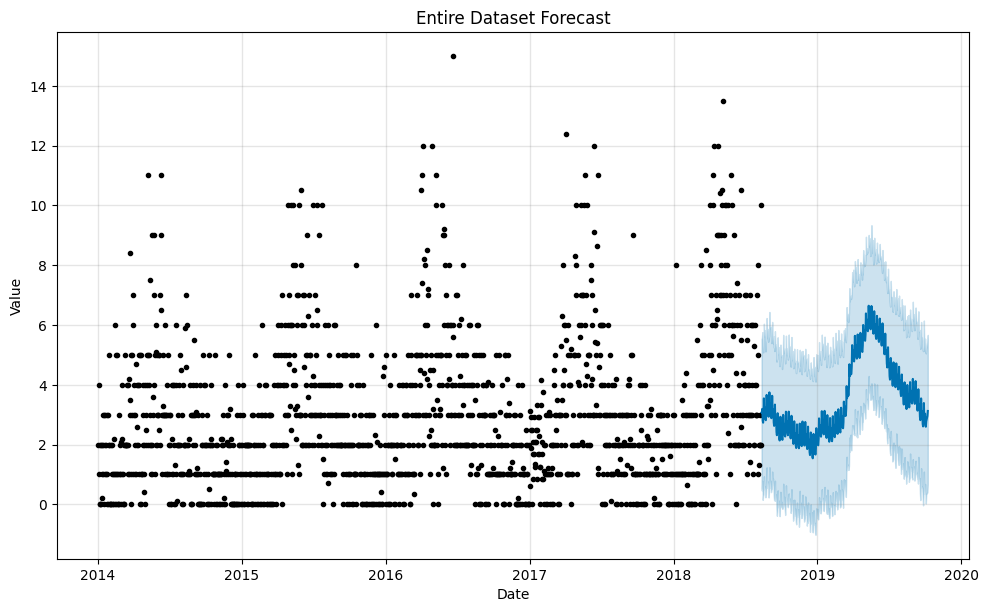

In [ ]:
# Plotting the forecast for the entire dataset
fig = model.plot(forecast)
plt.title('Entire Dataset Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


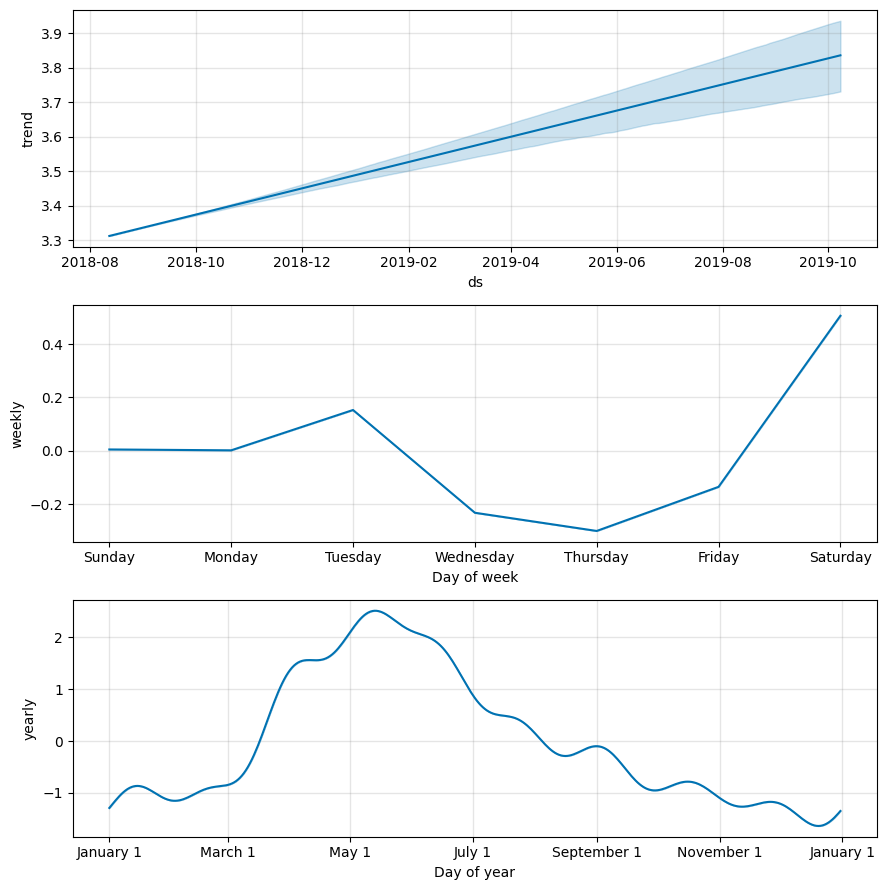

In [ ]:
# Plotting the components (trend, weekly seasonality, and yearly seasonality)
fig = model.plot_components(forecast)
plt.show()

predicting for 100 days

In [ ]:
future = model.make_future_dataframe(periods=100)  # Forecasting for the length of the test set
# future = model.make_future_dataframe(periods=len(test_data),freq='D')  # Forecasting for the length of the test set
forecast1 = model.predict(future)

In [ ]:
# Extracting actual and predicted values for the test set
actual_values_test = validation_data['y'].values
predicted_values_test = forecast1['yhat'][-len(validation_data):].values

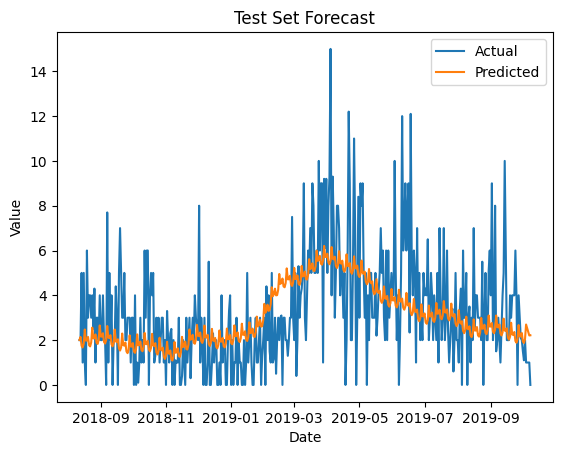

In [ ]:
# Plotting the forecast for the test set

plt.plot(validation_data['ds'], actual_values_test, label='Actual')
plt.plot(validation_data['ds'], predicted_values_test, label='Predicted')
plt.title('Test Set Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()

plt.show()

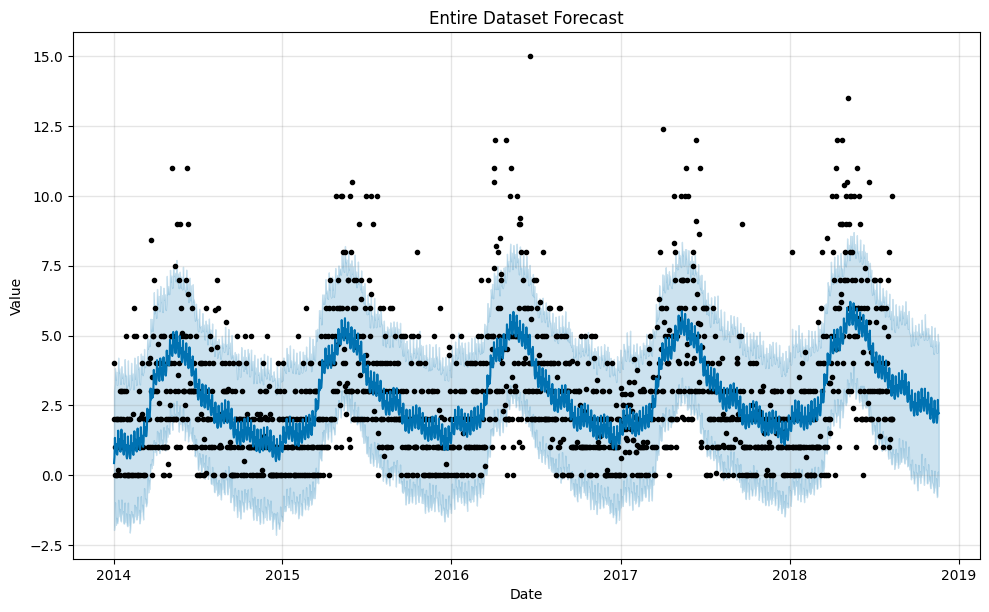

In [ ]:
# Plotting the forecast for the entire dataset
fig = model.plot(forecast1)
plt.title('Entire Dataset Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# **MODEL COMPARISON**

In [ ]:
# ARIMA MODEL
for drug, params in best_model_params.items():
    print(f'Drug: {drug}, Best Arima MSE: {params["best_mse"]:.2f}')


# PROPHET MODEL
print("\nprophet MSE values for each drug sales column:")
for i, column in enumerate(drug_sales_columns):
    print(f"{column}: {mse_list[i]}")

#LSTM MODEL
for category, metrics in results.items():
    print(f"Category: {category}, LSTM MSE: {metrics['LSTM MSE']}")

Drug: M01AB, Best Arima MSE: 8.01
Drug: M01AE, Best Arima MSE: 4.98
Drug: N02BA, Best Arima MSE: 3.80
Drug: N02BE, Best Arima MSE: 249.87
Drug: N05B, Best Arima MSE: 17.77
Drug: N05C, Best Arima MSE: 1.22
Drug: R03, Best Arima MSE: 74.66
Drug: R06, Best Arima MSE: 6.63

prophet MSE values for each drug sales column:
M01AB: 8.581928051140846
M01AE: 4.649740890553536
N02BA: 4.3708686635416925
N02BE: 177.73256121815768
N05B: 29.19803243168664
N05C: 1.2666726150816774
R03: 68.01815998238547
R06: 4.9665117832838295
Category: M01AB, LSTM MSE: 32.6173699092454
Category: M01AE, LSTM MSE: 17.412744000473264
Category: N02BA, LSTM MSE: 11.37642561548365
Category: N02BE, LSTM MSE: 1165.3992482130486
Category: N05B, LSTM MSE: 88.49457017029289
Category: N05C, LSTM MSE: 1.6313927578754361
Category: R03, LSTM MSE: 125.37151286683302
Category: R06, LSTM MSE: 15.216887464128025


When comparing options, selecting the prophet model demonstrates superior performance.

Forecasting Prophet

In [ ]:
future = model.make_future_dataframe(periods=100)  # Forecasting for the length of the test set
# future = model.make_future_dataframe(periods=len(test_data),freq='D')  # Forecasting for the length of the test set
forecast1 = model.predict(future)

In [ ]:
# Extracting actual and predicted values for the test set
actual_values_test = validation_data['y'].values
predicted_values_test = forecast1['yhat'][-len(validation_data):].values

In [ ]:
forecast[['ds', 'yhat']].tail(100)

ds      yhat
321 2019-06-29  5.253051
322 2019-06-30  4.690685
323 2019-07-01  4.628361
324 2019-07-02  4.723458
325 2019-07-03  4.286797
..         ...       ...
416 2019-10-02  2.653243
417 2019-10-03  2.594366
418 2019-10-04  2.771287
419 2019-10-07  2.953920
420 2019-10-08  3.121825

[100 rows x 2 columns]